In [91]:
import soundfile
import numpy as np
from scipy import signal
import librosa.feature as feat
import librosa.display
import librosa as lr
import os
import pandas as pd
import glob
import re
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
from pathlib import Path 

In [2]:
WORD_RE = re.compile(r"X_train/([\w]+[\D]*)")
WORD_RE.findall('/users/2024/ds2/119008303/Documents/Statistiques en grande dimension et apprentissage/DataChallenge/X_train/09053-StMARTIN.wav')

['09053-StMARTIN.wav']

In [3]:
def listdir_nohidden(path):
    return glob.glob(os.path.join(path, '*'))

#Récupérer les noms des fichiers dans X_train
L=listdir_nohidden('/users/2024/ds2/119008303/Documents/Statistiques en grande dimension et apprentissage/DataChallenge/X_train')
L2=os.listdir('/users/2024/ds2/119008303/Documents/Statistiques en grande dimension et apprentissage/DataChallenge/X_train')

print(len(L),len(L2)) #Un élément caché dans listdir classique
print(L[0:10],L2[0:10])



23168 23169
['/users/2024/ds2/119008303/Documents/Statistiques en grande dimension et apprentissage/DataChallenge/X_train/09053-StMARTIN.wav', '/users/2024/ds2/119008303/Documents/Statistiques en grande dimension et apprentissage/DataChallenge/X_train/03617-StMARTIN.wav', '/users/2024/ds2/119008303/Documents/Statistiques en grande dimension et apprentissage/DataChallenge/X_train/13702-GUA.wav', '/users/2024/ds2/119008303/Documents/Statistiques en grande dimension et apprentissage/DataChallenge/X_train/02317-StMARTIN.wav', '/users/2024/ds2/119008303/Documents/Statistiques en grande dimension et apprentissage/DataChallenge/X_train/08553-StMARTIN.wav', '/users/2024/ds2/119008303/Documents/Statistiques en grande dimension et apprentissage/DataChallenge/X_train/17935-BON.wav', '/users/2024/ds2/119008303/Documents/Statistiques en grande dimension et apprentissage/DataChallenge/X_train/04545-GUA.wav', '/users/2024/ds2/119008303/Documents/Statistiques en grande dimension et apprentissage/DataC

In [4]:
#Création du dataframe contenant les features de X_train
d={'id': [],'mean(rms)':[], 'std(rms)':[], 'min(rms)': [], 'max(rms)': [],
                'mean(sc)': [], 'std(sc)': [], 'min(sc)': [] , 'max(sc)': [],
                'mean(sb)': [], 'std(sb)': [], 'min(sb)': [], 'max(sb)': [],
                'mean(sl)': [], 'std(sl)': [], 'min(sl)': [], 'max(sl)': []
               }
WORD_RE = re.compile(r"X_train/([\w]+[\D]*)")
df=pd.DataFrame(data=d)
#print(df,len(df))   #Vide normalement


#Remplissage du dataframe
for i in L:
    print(WORD_RE.findall(i)[0])
    filename = f"{i}"
    sig, sr = soundfile.read(filename)

    sos = signal.butter(6, [5000, 100000], 'bandpass', fs=sr, output='sos')
    sig = signal.sosfiltfilt(sos, sig)
    rms = feat.rms(y=sig) 
    sc = feat.spectral_centroid(y=sig, sr=sr)
    sb = feat.spectral_bandwidth(y=sig,sr=sr)
    sl = feat.spectral_flatness(y=sig)
    
    features = [WORD_RE.findall(i)[0],np.mean(rms), np.std(rms), np.min(rms), np.max(rms),\
            np.mean(sc), np.std(sc), np.min(sc), np.max(sc),\
            np.mean(sb), np.std(sb), np.min(sb), np.max(sb),\
            np.mean(sl), np.std(sl), np.min(sl), np.max(sl)]
    #print(features)
    df.loc[len(df)]=features

09053-StMARTIN.wav
03617-StMARTIN.wav
13702-GUA.wav
02317-StMARTIN.wav
08553-StMARTIN.wav
17935-BON.wav
04545-GUA.wav
16124-GUA.wav
09006-StMARTIN.wav
03642-StMARTIN.wav
08506-StMARTIN.wav
14744-GUA.wav
17519-JAM.wav
21619-GUA.wav
12010-StMARTIN.wav
05137-GUA.wav
00493-BAHAMAS.wav
10192-BON.wav
12045-StMARTIN.wav
08958-StMARTIN.wav
00393-BON.wav
12247-JAM.wav
18227-BON.wav
21761-GUA.wav
15336-GUA.wav
17461-JAM.wav
14754-GUA.wav
10843-StEUS.wav
21609-GUA.wav
23019-StMARTIN.wav
22519-StMARTIN.wav
17509-JAM.wav
05897-ARUBA.wav
13712-GUA.wav
17925-BON.wav
16134-GUA.wav
04555-GUA.wav
00383-BON.wav
12257-JAM.wav
18237-BON.wav
22947-StMARTIN.wav
17471-JAM.wav
15326-GUA.wav
21771-GUA.wav
11240-BERMUDE.wav
05127-GUA.wav
22912-StMARTIN.wav
10182-BON.wav
14888-GUA.wav
01536-GUA.wav
03199-StMARTIN.wav
19482-GUA.wav
11196-BERMUDE.wav
22326-GUA.wav
04310-GUA.wav
16646-JAM.wav
14111-GUA.wav
08288-StMARTIN.wav
20546-GUA.wav
13060-JAM.wav
19000-BON.wav
09683-GUA.wav
20073-StMARTIN.wav
08277-StMARTIN.wa

19657-GUA.wav
13382-GUA.wav
02395-BAHAMAS.wav
21299-GUA.wav
09456-GUA.wav
01361-BON.wav
17199-JAM.wav
04641-GUA.wav
16220-GUA.wav
13406-GUA.wav
09750-BON.wav
01150-JAM.wav
14440-GUA.wav
07830-BON.wav
10296-BON.wav
16358-GUA.wav
04739-GUA.wav
05233-GUA.wav
01028-JAM.wav
21465-GUA.wav
15032-GUA.wav
14538-GUA.wav
18123-BON.wav
06287-ARUBA.wav
00522-JAM.wav
12143-JAM.wav
19932-GUA.wav
01140-JAM.wav
14450-GUA.wav
07820-BON.wav
11060-StEUS.wav
16230-GUA.wav
04651-GUA.wav
09740-BON.wav
13416-GUA.wav
15022-GUA.wav
06552-ARUBA.wav
01038-JAM.wav
21475-GUA.wav
18133-BON.wav
12153-JAM.wav
00532-JAM.wav
19922-GUA.wav
14528-GUA.wav
06078-ARUBA.wav
04729-GUA.wav
11347-StMARTIN.wav
16348-GUA.wav
10286-BON.wav
08084-StEUS.wav
05223-GUA.wav
22022-GUA.wav
02401-BAHAMAS.wav
05805-BON.wav
16475-GUA.wav
19786-GUA.wav
06308-ARUBA.wav
13253-GUA.wav
03921-StMARTIN.wav
08691-StMARTIN.wav
02843-BON.wav
21348-GUA.wav
09587-GUA.wav
02151-BAHAMAS.wav
01705-JAM.wav
17048-JAM.wav
20834-StMARTIN.wav
14215-GUA.wav
0358

06844-BON.wav
17363-JAM.wav
15434-GUA.wav
22559-StMARTIN.wav
01519-GUA.wav
05635-GUA.wav
10876-StEUS.wav
23059-StMARTIN.wav
10690-BON.wav
22309-GUA.wav
16711-JAM.wav
14046-GUA.wav
20411-GUA.wav
22952-StMARTIN.wav
13999-GUA.wav
13137-JAM.wav
22907-StMARTIN.wav
21882-GUA.wav
22271-GUA.wav
11310-BERMUDE.wav
04247-GUA.wav
18557-BON.wav
12537-JAM.wav
13893-GUA.wav
21011-GUA.wav
06836-BON.wav
20286-StMARTIN.wav
17311-JAM.wav
15446-GUA.wav
05647-GUA.wav
01870-BON.wav
21988-GUA.wav
03393-StMARTIN.wav
20463-GUA.wav
16763-JAM.wav
14034-GUA.wav
17269-JAM.wav
21169-GUA.wav
01091-BON.wav
13145-JAM.wav
04235-GUA.wav
10862-StEUS.wav
03339-StMARTIN.wav
20279-StMARTIN.wav
01908-BON.wav
02639-StMARTIN.wav
22203-GUA.wav
05657-GUA.wav
10786-StEUS.wav
21998-GUA.wav
01860-BON.wav
13883-GUA.wav
18547-BON.wav
12527-JAM.wav
06826-BON.wav
15456-GUA.wav
17301-JAM.wav
21001-GUA.wav
22213-GUA.wav
01918-BON.wav
04225-GUA.wav
14024-GUA.wav
16773-JAM.wav
20473-GUA.wav
01081-BON.wav
21179-GUA.wav
00890-GUA.wav
13155-J

01378-BON.wav
07634-BON.wav
02012-BON.wav
10473-BON.wav
21504-GUA.wav
01149-JAM.wav
17604-JAM.wav
15153-GUA.wav
07829-BON.wav
14459-GUA.wav
19853-GUA.wav
18042-BON.wav
02796-BON.wav
00574-GUA.wav
04658-GUA.wav
16239-GUA.wav
05352-GUA.wav
20997-GUA.wav
09749-BON.wav
00467-BAHAMAS.wav
01031-JAM.wav
22391-StMARTIN.wav
14521-GUA.wav
16341-GUA.wav
04720-GUA.wav
13567-GUA.wav
20175-StMARTIN.wav
16229-GUA.wav
08371-StMARTIN.wav
04648-GUA.wav
02786-BON.wav
03035-StMARTIN.wav
00564-GUA.wav
20987-GUA.wav
09759-BON.wav
05342-GUA.wav
02560-StMARTIN.wav
20120-StMARTIN.wav
06477-ARUBA.wav
15143-GUA.wav
08324-StMARTIN.wav
17614-JAM.wav
02994-StMARTIN.wav
06194-ARUBA.wav
21514-GUA.wav
03060-StMARTIN.wav
01159-JAM.wav
19843-GUA.wav
18052-BON.wav
07839-BON.wav
14449-GUA.wav
04730-GUA.wav
16351-GUA.wav
13577-GUA.wav
15748-BERMUDE.wav
01021-JAM.wav
14531-GUA.wav
11145-StEUS.wav
04994-GUA.wav
17051-JAM.wav
21351-GUA.wav
09885-BON.wav
12677-JAM.wav
18617-BON.wav
22841-StMARTIN.wav
11658-StMARTIN.wav
11162-B

21184-GUA.wav
15766-BERMUDE.wav
13906-GUA.wav
03902-StMARTIN.wav
20817-StMARTIN.wav
07530-BON.wav
03957-StMARTIN.wav
14940-GUA.wav
04354-GUA.wav
11319-BERMUDE.wav
10947-StEUS.wav
01869-BON.wav
21991-GUA.wav
20502-GUA.wav
16602-JAM.wav
14155-GUA.wav
00455-BAHAMAS.wav
17308-JAM.wav
13024-JAM.wav
05993-ARUBA.wav
21008-GUA.wav
01911-BON.wav
07977-StEUS.wav
00037-JAM.wav
12456-JAM.wav
18436-BON.wav
00899-GUA.wav
21170-GUA.wav
01088-BON.wav
17270-JAM.wav
15527-GUA.wav
06957-BON.wav
00863-ARUBA.wav
14145-GUA.wav
16612-JAM.wav
20512-GUA.wav
13034-JAM.wav
21018-GUA.wav
17318-JAM.wav
11286-BERMUDE.wav
00787-ARUBA.wav
21981-GUA.wav
01879-BON.wav
04344-GUA.wav
12446-JAM.wav
00027-JAM.wav
18426-BON.wav
03102-StMARTIN.wav
20042-StMARTIN.wav
08246-StMARTIN.wav
15537-GUA.wav
17260-JAM.wav
06947-BON.wav
00889-GUA.wav
01098-BON.wav
21160-GUA.wav
03157-StMARTIN.wav
20017-StMARTIN.wav
08213-StMARTIN.wav
01901-BON.wav
19293-GUA.wav
13746-GUA.wav
22528-StMARTIN.wav
17971-BON.wav
23028-StMARTIN.wav
16160-GUA

11452-StMARTIN.wav
02807-BON.wav
04050-StMARTIN.wav
01741-JAM.wav
20606-GUA.wav
10487-BON.wav
22640-StMARTIN.wav
11859-StMARTIN.wav
05422-GUA.wav
06456-ARUBA.wav
21274-GUA.wav
01639-JAM.wav
22615-StMARTIN.wav
15623-GUA.wav
17174-JAM.wav
14329-GUA.wav
18732-BON.wav
12752-JAM.wav
02817-BON.wav
01751-JAM.wav
03910-StMARTIN.wav
14241-GUA.wav
20616-GUA.wav
22076-GUA.wav
05851-BON.wav
16421-GUA.wav
03945-StMARTIN.wav
20805-StMARTIN.wav
13207-GUA.wav
17164-JAM.wav
15633-GUA.wav
21264-GUA.wav
01629-JAM.wav
18722-BON.wav
12742-JAM.wav
14339-GUA.wav
04138-GUA.wav
10497-BON.wav
06383-ARUBA.wav
05432-GUA.wav
16264-GUA.wav
04605-GUA.wav
15897-GUA.wav
11389-StMARTIN.wav
13442-GUA.wav
18986-BON.wav
19197-GUA.wav
01114-JAM.wav
06510-ARUBA.wav
21559-GUA.wav
09396-GUA.wav
14404-GUA.wav
07874-BON.wav
02197-BAHAMAS.wav
05277-GUA.wav
07095-BON.wav
15076-GUA.wav
11376-StMARTIN.wav
21421-GUA.wav
18167-BON.wav
12107-JAM.wav
19976-GUA.wav
11022-StEUS.wav
01104-JAM.wav
21549-GUA.wav
09386-GUA.wav
14414-GUA.wav


12913-JAM.wav
18973-BON.wav
19162-GUA.wav
10237-BON.wav
02656-BON.wav
04798-GUA.wav
02557-StMARTIN.wav
20117-StMARTIN.wav
05292-GUA.wav
08313-StMARTIN.wav
07070-BON.wav
03057-StMARTIN.wav
20857-GUA.wav
15093-GUA.wav
20142-StMARTIN.wav
14599-GUA.wav
08346-StMARTIN.wav
18182-BON.wav
19993-GUA.wav
03002-StMARTIN.wav
16281-GUA.wav
15872-GUA.wav
12903-JAM.wav
18963-BON.wav
19172-GUA.wav
07108-BON.wav
05768-BON.wav
00137-StEUS.wav
01444-BON.wav
09373-GUA.wav
04072-StMARTIN.wav
15978-GUA.wav
11884-StMARTIN.wav
11470-StMARTIN.wav
10245-BON.wav
18869-BON.wav
12809-JAM.wav
19078-GUA.wav
07002-BON.wav
04027-StMARTIN.wav
11425-StMARTIN.wav
09279-GUA.wav
12190-JAM.wav
22637-StMARTIN.wav
04692-GUA.wav
05398-GUA.wav
12971-JAM.wav
09783-BON.wav
18911-BON.wav
19100-GUA.wav
01436-BON.wav
09301-GUA.wav
22662-StMARTIN.wav
15199-GUA.wav
14493-GUA.wav
18088-BON.wav
19899-GUA.wav
09269-GUA.wav
03593-StMARTIN.wav
20827-StMARTIN.wav
12180-JAM.wav
03967-StMARTIN.wav
02093-StMARTIN.wav
10255-BON.wav
15968-GUA.wa

00673-JAM.wav
14669-GUA.wav
04468-GUA.wav
16009-GUA.wav
17818-BON.wav
05162-GUA.wav
07380-BON.wav
14711-GUA.wav
16171-GUA.wav
04510-GUA.wav
17960-BON.wav
13757-GUA.wav
19282-GUA.wav
10903-StEUS.wav
16019-GUA.wav
04478-GUA.wav
17808-BON.wav
05172-GUA.wav
07390-BON.wav
21724-GUA.wav
17424-JAM.wav
15373-GUA.wav
14679-GUA.wav
18262-BON.wav
00663-JAM.wav
12202-JAM.wav
04500-GUA.wav
16161-GUA.wav
17970-BON.wav
07933-StEUS.wav
13747-GUA.wav
03045-StMARTIN.wav
19292-GUA.wav
20105-StMARTIN.wav
08301-StMARTIN.wav
00827-ARUBA.wav
03010-StMARTIN.wav
20150-StMARTIN.wav
14701-GUA.wav
08354-StMARTIN.wav
21161-GUA.wav
01099-BON.wav
11682-StMARTIN.wav
10768-StEUS.wav
00888-GUA.wav
06946-BON.wav
17261-JAM.wav
15536-GUA.wav
18427-BON.wav
00026-JAM.wav
12447-JAM.wav
01900-BON.wav
11628-StMARTIN.wav
17319-JAM.wav
21019-GUA.wav
13035-JAM.wav
22831-StMARTIN.wav
20513-GUA.wav
16613-JAM.wav
14144-GUA.wav
11332-BERMUDE.wav
04345-GUA.wav
22490-StMARTIN.wav
01878-BON.wav
21980-GUA.wav
22864-StMARTIN.wav
01910-BON

08697-StMARTIN.wav
19602-GUA.wav
07678-BON.wav
08668-StMARTIN.wav
04971-GUA.wav
12692-JAM.wav
09860-BON.wav
02079-StMARTIN.wav
10547-BON.wav
16489-GUA.wav
03579-StMARTIN.wav
07700-BON.wav
09260-GUA.wav
12189-JAM.wav
08818-StMARTIN.wav
15961-GUA.wav
16392-GUA.wav
19061-GUA.wav
18870-BON.wav
12810-JAM.wav
03757-StMARTIN.wav
05703-BON.wav
15180-GUA.wav
09113-StMARTIN.wav
08413-StMARTIN.wav
09318-GUA.wav
02257-StMARTIN.wav
19880-GUA.wav
05926-ARUBA.wav
18091-BON.wav
03702-StMARTIN.wav
15819-GUA.wav
08446-StMARTIN.wav
10324-BON.wav
02745-BON.wav
01803-JAM.wav
19119-GUA.wav
20944-GUA.wav
12968-JAM.wav
18908-BON.wav
07163-BON.wav
05381-GUA.wav
15971-GUA.wav
16382-GUA.wav
22807-StMARTIN.wav
19071-GUA.wav
18860-BON.wav
12800-JAM.wav
09270-GUA.wav
22852-StMARTIN.wav
12199-JAM.wav
02755-BON.wav
10334-BON.wav
01813-JAM.wav
15809-GUA.wav
07173-BON.wav
05391-GUA.wav
23159-StMARTIN.wav
22459-StMARTIN.wav
20954-GUA.wav
19109-GUA.wav
12978-JAM.wav
18918-BON.wav
09308-GUA.wav
05713-BON.wav
15190-GUA.wav

14727-GUA.wav
00871-ARUBA.wav
00288-BON.wav
11235-BERMUDE.wav
04004-StMARTIN.wav
10089-BON.wav
16147-GUA.wav
04526-GUA.wav
17956-BON.wav
11406-StMARTIN.wav
07965-StEUS.wav
13761-GUA.wav
01926-BON.wav
19589-GUA.wav
03294-StMARTIN.wav
14983-GUA.wav
06960-BON.wav
15510-GUA.wav
17247-JAM.wav
21147-GUA.wav
08185-StMARTIN.wav
20381-StMARTIN.wav
18401-BON.wav
12461-JAM.wav
00000-JAM.wav
04363-GUA.wav
05669-GUA.wav
13013-JAM.wav
01472-JAM.wav
06818-BON.wav
15468-GUA.wav
14162-GUA.wav
16635-JAM.wav
20535-GUA.wav
12519-JAM.wav
18579-BON.wav
21157-GUA.wav
11377-StMARTIN.wav
06970-BON.wav
17257-JAM.wav
15500-GUA.wav
18411-BON.wav
00010-JAM.wav
12471-JAM.wav
01936-BON.wav
14993-GUA.wav
19599-GUA.wav
02187-BAHAMAS.wav
06808-BON.wav
15478-GUA.wav
13003-JAM.wav
10813-StEUS.wav
20525-GUA.wav
12509-JAM.wav
18569-BON.wav
16625-JAM.wav
14172-GUA.wav
04373-GUA.wav
11388-StMARTIN.wav
22345-GUA.wav
05679-GUA.wav
00359-BON.wav
09164-GUA.wav
16838-JAM.wav
19365-GUA.wav
06100-ARUBA.wav
02539-BON.wav
10158-BON.w

15692-GUA.wav
04800-GUA.wav
01688-JAM.wav
18783-BON.wav
09911-BON.wav
14398-GUA.wav
08858-StMARTIN.wav
02436-BAHAMAS.wav
04199-GUA.wav
10436-BON.wav
07671-BON.wav
05493-GUA.wav
09572-GUA.wav
04978-GUA.wav
02242-StMARTIN.wav
08406-StMARTIN.wav
09106-StMARTIN.wav
03742-StMARTIN.wav
09869-BON.wav
16480-GUA.wav
07709-BON.wav
08453-StMARTIN.wav
19773-GUA.wav
03717-StMARTIN.wav
05913-ARUBA.wav
10426-BON.wav
22812-StMARTIN.wav
04189-GUA.wav
07661-BON.wav
05483-GUA.wav
01698-JAM.wav
22847-StMARTIN.wav
15682-GUA.wav
04810-GUA.wav
14388-GUA.wav
18793-BON.wav
09901-BON.wav
16490-GUA.wav
19763-GUA.wav
07719-BON.wav
22419-StMARTIN.wav
04968-GUA.wav
09562-GUA.wav
23119-StMARTIN.wav
09879-BON.wav
10454-BON.wav
19669-GUA.wav
08168-StMARTIN.wav
07613-BON.wav
04862-GUA.wav
09468-GUA.wav
03279-StMARTIN.wav
12781-JAM.wav
09973-BON.wav
20339-StMARTIN.wav
03286-StMARTIN.wav
05589-GUA.wav
19711-GUA.wav
09510-GUA.wav
01792-JAM.wav
14282-GUA.wav
08197-StMARTIN.wav
02138-BAHAMAS.wav
18699-BON.wav
20393-StMARTIN

19102-GUA.wav
07178-BON.wav
15802-GUA.wav
04690-GUA.wav
01818-JAM.wav
09487-GUA.wav
21248-GUA.wav
01605-JAM.wav
17148-JAM.wav
14315-GUA.wav
20742-GUA.wav
11606-StMARTIN.wav
22122-GUA.wav
06309-ARUBA.wav
19686-GUA.wav
13353-GUA.wav
11653-StMARTIN.wav
17030-JAM.wav
21330-GUA.wav
12616-JAM.wav
18676-BON.wav
23141-StMARTIN.wav
22441-StMARTIN.wav
23114-StMARTIN.wav
07784-BON.wav
22414-StMARTIN.wav
05566-GUA.wav
08855-StMARTIN.wav
22132-GUA.wav
19696-GUA.wav
06415-ARUBA.wav
13343-GUA.wav
08800-StMARTIN.wav
17158-JAM.wav
09497-GUA.wav
21258-GUA.wav
01615-JAM.wav
20752-GUA.wav
14305-GUA.wav
11127-StEUS.wav
07794-BON.wav
05576-GUA.wav
21320-GUA.wav
17020-JAM.wav
12606-JAM.wav
18666-BON.wav
01050-JAM.wav
22365-StMARTIN.wav
14540-GUA.wav
16320-GUA.wav
04741-GUA.wav
13506-GUA.wav
01128-JAM.wav
21565-GUA.wav
15132-GUA.wav
14438-GUA.wav
07848-BON.wav
06286-ARUBA.wav
18023-BON.wav
00197-BON.wav
19832-GUA.wav
10396-BON.wav
04639-GUA.wav
16258-GUA.wav
05333-GUA.wav
04751-GUA.wav
16330-GUA.wav
13516-GUA

04584-GUA.wav
19216-GUA.wav
11390-StMARTIN.wav
14785-GUA.wav
06221-ARUBA.wav
00342-BON.wav
12296-JAM.wav
10143-BON.wav
02522-BON.wav
02198-BAHAMAS.wav
07304-BON.wav
16823-JAM.wav
08162-StMARTIN.wav
20366-StMARTIN.wav
03226-StMARTIN.wav
14795-GUA.wav
06776-BON.wav
04594-GUA.wav
19206-GUA.wav
08137-StMARTIN.wav
20333-StMARTIN.wav
03273-StMARTIN.wav
05112-GUA.wav
04418-GUA.wav
16079-GUA.wav
22576-StMARTIN.wav
17868-BON.wav
05938-ARUBA.wav
22982-StMARTIN.wav
23076-StMARTIN.wav
10925-StEUS.wav
12262-JAM.wav
18202-BON.wav
14619-GUA.wav
17444-JAM.wav
15313-GUA.wav
22523-StMARTIN.wav
21744-GUA.wav
23023-StMARTIN.wav
07288-BON.wav
13727-GUA.wav
00801-ARUBA.wav
11731-StMARTIN.wav
16101-GUA.wav
04560-GUA.wav
22928-StMARTIN.wav
06782-BON.wav
17910-BON.wav
14761-GUA.wav
07915-StEUS.wav
22589-StMARTIN.wav
11764-StMARTIN.wav
23089-StMARTIN.wav
14609-GUA.wav
12272-JAM.wav
03678-StMARTIN.wav
18212-BON.wav
21754-GUA.wav
15303-GUA.wav
17454-JAM.wav
08569-StMARTIN.wav
05102-GUA.wav
09069-StMARTIN.wav
1606

18106-BON.wav
12166-JAM.wav
11106-StEUS.wav
16205-GUA.wav
04664-GUA.wav
12987-JAM.wav
09775-BON.wav
13423-GUA.wav
21538-GUA.wav
06434-ARUBA.wav
17638-JAM.wav
07815-BON.wav
14465-GUA.wav
21450-GUA.wav
15007-GUA.wav
03234-StMARTIN.wav
08170-StMARTIN.wav
19907-GUA.wav
18116-BON.wav
00517-JAM.wav
12176-JAM.wav
20374-StMARTIN.wav
03261-StMARTIN.wav
05206-GUA.wav
08125-StMARTIN.wav
20321-StMARTIN.wav
17628-JAM.wav
21528-GUA.wav
06328-ARUBA.wav
01165-JAM.wav
07805-BON.wav
14475-GUA.wav
04674-GUA.wav
16215-GUA.wav
13433-GUA.wav
09765-BON.wav
12997-JAM.wav
11459-StMARTIN.wav
16528-GUA.wav
04149-GUA.wav
06058-ARUBA.wav
05443-GUA.wav
06572-ARUBA.wav
06091-ARUBA.wav
01658-JAM.wav
21215-GUA.wav
17115-JAM.wav
15642-GUA.wav
11295-BERMUDE.wav
15769-BERMUDE.wav
14348-GUA.wav
18753-BON.wav
12733-JAM.wav
16450-GUA.wav
05820-BON.wav
11040-StEUS.wav
22007-GUA.wav
11807-StMARTIN.wav
13276-GUA.wav
11089-StEUS.wav
01720-JAM.wav
02866-BON.wav
01295-BON.wav
11852-StMARTIN.wav
20667-GUA.wav
16567-JAM.wav
14230-G

10032-BON.wav
02453-BON.wav
05097-GUA.wav
16952-JAM.wav
07275-BON.wav
16094-GUA.wav
06617-BON.wav
17885-BON.wav
19367-GUA.wav
09166-GUA.wav
10022-BON.wav
16942-JAM.wav
22346-StMARTIN.wav
05087-GUA.wav
07265-BON.wav
15286-GUA.wav
18397-BON.wav
01253-StMARTIN.wav
00223-BON.wav
06304-ARUBA.wav
03526-StMARTIN.wav
02549-BON.wav
10128-BON.wav
04487-GUA.wav
08662-StMARTIN.wav
06665-BON.wav
16848-JAM.wav
19315-GUA.wav
03573-StMARTIN.wav
06310-ARUBA.wav
02073-StMARTIN.wav
08637-StMARTIN.wav
03987-StMARTIN.wav
14686-GUA.wav
00329-BON.wav
20838-StMARTIN.wav
03978-StMARTIN.wav
10050-BON.wav
02191-BAHAMAS.wav
16930-JAM.wav
07217-BON.wav
12385-JAM.wav
00251-BON.wav
06126-ARUBA.wav
11831-StMARTIN.wav
00339-BON.wav
14696-GUA.wav
22628-StMARTIN.wav
04497-GUA.wav
06675-BON.wav
10138-BON.wav
11864-StMARTIN.wav
19305-GUA.wav
04092-StMARTIN.wav
16858-JAM.wav
11490-StMARTIN.wav
12395-JAM.wav
00241-BON.wav
22682-StMARTIN.wav
10040-BON.wav
16920-JAM.wav
07207-BON.wav
04038-StMARTIN.wav
11223-BERMUDE.wav
21817

01790-JAM.wav
19713-GUA.wav
10928-StEUS.wav
07769-BON.wav
11199-BERMUDE.wav
06511-ARUBA.wav
01014-JAM.wav
09296-GUA.wav
21459-GUA.wav
14504-GUA.wav
15997-GUA.wav
04705-GUA.wav
16364-GUA.wav
18886-BON.wav
13542-GUA.wav
19097-GUA.wav
15176-GUA.wav
17621-JAM.wav
21521-GUA.wav
18067-BON.wav
19876-GUA.wav
11023-StEUS.wav
02951-StMARTIN.wav
05377-GUA.wav
07195-BON.wav
15987-GUA.wav
16374-GUA.wav
04715-GUA.wav
13552-GUA.wav
18896-BON.wav
19087-GUA.wav
22354-StMARTIN.wav
09286-GUA.wav
21449-GUA.wav
14514-GUA.wav
02420-BAHAMAS.wav
05367-GUA.wav
07185-BON.wav
21531-GUA.wav
17631-JAM.wav
02170-BAHAMAS.wav
15166-GUA.wav
18077-BON.wav
19866-GUA.wav
08490-StMARTIN.wav
02907-BON.wav
08864-StMARTIN.wav
01641-JAM.wav
20706-GUA.wav
14351-GUA.wav
16531-GUA.wav
04150-GUA.wav
02281-StMARTIN.wav
22166-GUA.wav
03781-StMARTIN.wav
08831-StMARTIN.wav
13317-GUA.wav
21374-GUA.wav
01739-JAM.wav
17074-JAM.wav
14229-GUA.wav
12652-JAM.wav
18632-BON.wav
10587-BON.wav
05839-BON.wav
16449-GUA.wav
06457-ARUBA.wav
05522-G

04926-GUA.wav
07969-StEUS.wav
09837-BON.wav
02578-StMARTIN.wav
22089-GUA.wav
10510-BON.wav
20138-StMARTIN.wav
03078-StMARTIN.wav
07757-BON.wav
02587-StMARTIN.wav
00478-BAHAMAS.wav
10990-StEUS.wav
01363-BON.wav
02973-StMARTIN.wav
09454-GUA.wav
03087-StMARTIN.wav
10959-StEUS.wav
20192-StMARTIN.wav
11334-BERMUDE.wav
05944-ARUBA.wav
08396-StMARTIN.wav
10468-BON.wav
02009-BON.wav
19655-GUA.wav
13380-GUA.wav
10500-BON.wav
22099-GUA.wav
07747-BON.wav
04936-GUA.wav
09827-BON.wav
22376-StMARTIN.wav
02019-BON.wav
10478-BON.wav
00750-ARUBA.wav
00799-ARUBA.wav
22389-StMARTIN.wav
19645-GUA.wav
13390-GUA.wav
09444-GUA.wav
01373-BON.wav
15757-BERMUDE.wav
01573-BAHAMAS.wav
08813-StMARTIN.wav
05762-BON.wav
09379-GUA.wav
12090-JAM.wav
15878-GUA.wav
08846-StMARTIN.wav
10345-BON.wav
02724-BON.wav
12909-JAM.wav
18969-BON.wav
19178-GUA.wav
20925-GUA.wav
07102-BON.wav
09201-GUA.wav
03709-StMARTIN.wav
15099-GUA.wav
14593-GUA.wav
18188-BON.wav
09118-StMARTIN.wav
15900-GUA.wav
04792-GUA.wav
08418-StMARTIN.wav
0

00071-JAM.wav
12410-JAM.wav
01957-BON.wav
00813-ARUBA.wav
07582-BON.wav
17927-BON.wav
04557-GUA.wav
16136-GUA.wav
02499-BON.wav
03544-StMARTIN.wav
13710-GUA.wav
02044-StMARTIN.wav
10795-StEUS.wav
08600-StMARTIN.wav
16998-JAM.wav
03511-StMARTIN.wav
08655-StMARTIN.wav
14756-GUA.wav
10180-BON.wav
05125-GUA.wav
13668-GUA.wav
21773-GUA.wav
00456-BAHAMAS.wav
15324-GUA.wav
17473-JAM.wav
00381-BON.wav
18235-BON.wav
12255-JAM.wav
11853-StMARTIN.wav
14746-GUA.wav
02489-BON.wav
11806-StMARTIN.wav
07888-StEUS.wav
17937-BON.wav
16126-GUA.wav
04547-GUA.wav
16988-JAM.wav
13700-GUA.wav
15779-BERMUDE.wav
17463-JAM.wav
15334-GUA.wav
11285-BERMUDE.wav
21763-GUA.wav
00185-StEUS.wav
00391-BON.wav
18225-BON.wav
12245-JAM.wav
10190-BON.wav
11458-StMARTIN.wav
13678-GUA.wav
10871-StEUS.wav
05135-GUA.wav
06162-ARUBA.wav
13865-GUA.wav
06481-ARUBA.wav
00415-BON.wav
09628-GUA.wav
03461-StMARTIN.wav
06448-ARUBA.wav
03895-StMARTIN.wav
08725-StMARTIN.wav
17652-BON.wav
14823-GUA.wav
07453-BON.wav
19429-GUA.wav
01886-B

00881-ARUBA.wav
03038-StMARTIN.wav
00848-ARUBA.wav
20178-StMARTIN.wav
15847-GUA.wav
07995-StEUS.wav
19147-GUA.wav
12936-JAM.wav
18956-BON.wav
13492-GUA.wav
02999-StMARTIN.wav
08329-StMARTIN.wav
05971-ARUBA.wav
03092-StMARTIN.wav
02966-StMARTIN.wav
02592-StMARTIN.wav
10202-BON.wav
07045-BON.wav
20862-GUA.wav
08383-StMARTIN.wav
11264-BERMUDE.wav
15798-BERMUDE.wav
20187-StMARTIN.wav
15857-GUA.wav
19157-GUA.wav
13482-GUA.wav
12926-JAM.wav
18946-BON.wav
21599-GUA.wav
09356-GUA.wav
01461-BON.wav
22363-StMARTIN.wav
10212-BON.wav
20872-GUA.wav
07055-BON.wav
02200-BAHAMAS.wav
00765-ARUBA.wav
15825-GUA.wav
02779-BON.wav
10318-BON.wav
20978-GUA.wav
19125-GUA.wav
12954-JAM.wav
03908-StMARTIN.wav
18934-BON.wav
09324-GUA.wav
01413-BON.wav
00771-ARUBA.wav
10260-BON.wav
02056-StMARTIN.wav
07027-BON.wav
08612-StMARTIN.wav
03556-StMARTIN.wav
13588-GUA.wav
21493-GUA.wav
08647-StMARTIN.wav
03503-StMARTIN.wav
01403-BON.wav
09334-GUA.wav
05965-ARUBA.wav
10308-BON.wav
02769-BON.wav
15835-GUA.wav
04048-StMART

21602-GUA.wav
12324-JAM.wav
18344-BON.wav
05980-ARUBA.wav
08830-StMARTIN.wav
10189-BON.wav
03780-StMARTIN.wav
02280-StMARTIN.wav
04426-GUA.wav
16047-GUA.wav
17856-BON.wav
07964-StEUS.wav
13661-GUA.wav
08865-StMARTIN.wav
08491-StMARTIN.wav
14627-GUA.wav
00870-ARUBA.wav
00388-BON.wav
19430-GUA.wav
23001-StMARTIN.wav
21967-GUA.wav
22501-StMARTIN.wav
23054-StMARTIN.wav
11096-StEUS.wav
09631-GUA.wav
22554-StMARTIN.wav
00917-GUA.wav
07532-BON.wav
14942-GUA.wav
19548-GUA.wav
11746-StMARTIN.wav
08072-StEUS.wav
06047-ARUBA.wav
13904-GUA.wav
21186-GUA.wav
11713-StMARTIN.wav
17733-BON.wav
17286-JAM.wav
09621-GUA.wav
00907-GUA.wav
19420-GUA.wav
21977-GUA.wav
12008-StMARTIN.wav
13914-GUA.wav
00513-BAHAMAS.wav
08915-StMARTIN.wav
17723-BON.wav
06271-ARUBA.wav
17296-JAM.wav
21196-GUA.wav
19558-GUA.wav
08940-StMARTIN.wav
07522-BON.wav
14952-GUA.wav
16938-JAM.wav
01587-BAHAMAS.wav
19265-GUA.wav
06101-ARUBA.wav
10058-BON.wav
11189-BERMUDE.wav
16196-GUA.wav
06715-BON.wav
17987-BON.wav
00259-BON.wav
16840-

16353-GUA.wav
04732-GUA.wav
20995-GUA.wav
05350-GUA.wav
02666-StMARTIN.wav
20226-StMARTIN.wav
02794-BON.wav
00576-GUA.wav
03366-StMARTIN.wav
19851-GUA.wav
18040-BON.wav
20273-StMARTIN.wav
02633-StMARTIN.wav
15151-GUA.wav
17606-JAM.wav
21506-GUA.wav
03333-StMARTIN.wav
05228-GUA.wav
11271-BERMUDE.wav
13565-GUA.wav
08088-StMARTIN.wav
04722-GUA.wav
16343-GUA.wav
06445-ARUBA.wav
14523-GUA.wav
19929-GUA.wav
12158-JAM.wav
00539-JAM.wav
18138-BON.wav
01033-JAM.wav
03399-StMARTIN.wav
15029-GUA.wav
05726-BON.wav
11671-StMARTIN.wav
22868-StMARTIN.wav
00582-GUA.wav
01826-JAM.wav
02760-BON.wav
10301-BON.wav
11624-StMARTIN.wav
07146-BON.wav
10770-StEUS.wav
02209-BAHAMAS.wav
20961-GUA.wav
09245-GUA.wav
22436-StMARTIN.wav
23136-StMARTIN.wav
15944-GUA.wav
10279-BON.wav
13591-GUA.wav
18855-BON.wav
12835-JAM.wav
22463-StMARTIN.wav
19044-GUA.wav
23163-StMARTIN.wav
22897-StMARTIN.wav
02292-StMARTIN.wav
01836-JAM.wav
00592-GUA.wav
03792-StMARTIN.wav
10311-BON.wav
02770-BON.wav
08822-StMARTIN.wav
20971-GUA.w

07393-BON.wav
05171-GUA.wav
04346-GUA.wav
00851-ARUBA.wav
21983-GUA.wav
00490-BAHAMAS.wav
07945-StEUS.wav
13036-JAM.wav
13898-GUA.wav
20510-GUA.wav
16610-JAM.wav
14147-GUA.wav
01903-BON.wav
22208-GUA.wav
05968-ARUBA.wav
21162-GUA.wav
10975-StEUS.wav
17262-JAM.wav
15535-GUA.wav
06945-BON.wav
16768-JAM.wav
18424-BON.wav
00025-JAM.wav
12444-JAM.wav
20468-GUA.wav
13026-JAM.wav
14157-GUA.wav
16600-JAM.wav
13888-GUA.wav
20500-GUA.wav
21993-GUA.wav
04356-GUA.wav
11243-BERMUDE.wav
15525-GUA.wav
17272-JAM.wav
06955-BON.wav
21172-GUA.wav
18434-BON.wav
12454-JAM.wav
00035-JAM.wav
20478-GUA.wav
03251-StMARTIN.wav
16778-JAM.wav
20311-StMARTIN.wav
08115-StMARTIN.wav
22218-GUA.wav
01913-BON.wav
03204-StMARTIN.wav
20344-StMARTIN.wav
08140-StMARTIN.wav
15732-BERMUDE.wav
00204-BON.wav
06250-ARUBA.wav
07242-BON.wav
16965-JAM.wav
19238-GUA.wav
02464-BON.wav
10005-BON.wav
06299-ARUBA.wav
06748-BON.wav
19340-GUA.wav
13695-GUA.wav
06630-BON.wav
19228-GUA.wav
07252-BON.wav
16975-JAM.wav
06758-BON.wav
06066-AR

17538-JAM.wav
14765-GUA.wav
17914-BON.wav
06786-BON.wav
16105-GUA.wav
04564-GUA.wav
13723-GUA.wav
03315-StMARTIN.wav
15317-GUA.wav
17440-JAM.wav
21740-GUA.wav
02615-StMARTIN.wav
20255-StMARTIN.wav
18206-BON.wav
12266-JAM.wav
11105-StEUS.wav
03340-StMARTIN.wav
20200-StMARTIN.wav
02640-StMARTIN.wav
05116-GUA.wav
17904-BON.wav
06796-BON.wav
04574-GUA.wav
16115-GUA.wav
13733-GUA.wav
17528-JAM.wav
21628-GUA.wav
01580-BAHAMAS.wav
14775-GUA.wav
05106-GUA.wav
21750-GUA.wav
17450-JAM.wav
15307-GUA.wav
18216-BON.wav
12276-JAM.wav
17976-BON.wav
16167-GUA.wav
04506-GUA.wav
19294-GUA.wav
13741-GUA.wav
14707-GUA.wav
20791-StMARTIN.wav
08595-StMARTIN.wav
09095-StMARTIN.wav
08961-StMARTIN.wav
13639-GUA.wav
07396-BON.wav
05174-GUA.wav
17422-JAM.wav
15375-GUA.wav
21722-GUA.wav
12029-StMARTIN.wav
08934-StMARTIN.wav
03684-StMARTIN.wav
18264-BON.wav
12204-JAM.wav
00665-JAM.wav
11111-StEUS.wav
11798-StMARTIN.wav
22575-StMARTIN.wav
23075-StMARTIN.wav
14717-GUA.wav
22981-StMARTIN.wav
17966-BON.wav
04516-GUA.w

21334-GUA.wav
03288-StMARTIN.wav
13357-GUA.wav
19682-GUA.wav
22126-GUA.wav
08199-StMARTIN.wav
14311-GUA.wav
09998-BON.wav
20746-GUA.wav
01601-JAM.wav
09483-GUA.wav
04889-GUA.wav
18662-BON.wav
12602-JAM.wav
01769-JAM.wav
21324-GUA.wav
17024-JAM.wav
05572-GUA.wav
07790-BON.wav
10907-StEUS.wav
11394-StMARTIN.wav
16419-GUA.wav
05869-BON.wav
09988-BON.wav
20756-GUA.wav
14301-GUA.wav
04899-GUA.wav
01611-JAM.wav
09493-GUA.wav
00823-ARUBA.wav
13347-GUA.wav
19692-GUA.wav
22136-GUA.wav
07937-StEUS.wav
09317-GUA.wav
01420-BON.wav
02607-StMARTIN.wav
20247-StMARTIN.wav
03307-StMARTIN.wav
14485-GUA.wav
20212-StMARTIN.wav
03352-StMARTIN.wav
04684-GUA.wav
15816-GUA.wav
19116-GUA.wav
12967-JAM.wav
09795-BON.wav
18907-BON.wav
06014-ARUBA.wav
12186-JAM.wav
10253-BON.wav
08021-StEUS.wav
07014-BON.wav
04694-GUA.wav
15806-GUA.wav
19106-GUA.wav
09785-BON.wav
12977-JAM.wav
18917-BON.wav
01430-BON.wav
09307-GUA.wav
14495-GUA.wav
10243-BON.wav
07004-BON.wav
02155-BAHAMAS.wav
06222-ARUBA.wav
12196-JAM.wav
02405-

17695-BON.wav
06807-BON.wav
22560-StMARTIN.wav
15477-GUA.wav
17320-JAM.wav
12506-JAM.wav
18566-BON.wav
23035-StMARTIN.wav
22535-StMARTIN.wav
11124-StEUS.wav
07494-BON.wav
05676-GUA.wav
17258-JAM.wav
21158-GUA.wav
13174-JAM.wav
11727-StMARTIN.wav
20452-GUA.wav
14005-GUA.wav
16752-JAM.wav
04204-GUA.wav
22232-GUA.wav
01939-BON.wav
11772-StMARTIN.wav
19596-GUA.wav
06416-ARUBA.wav
17543-JAM.wav
15214-GUA.wav
11902-StMARTIN.wav
21643-GUA.wav
00704-JAM.wav
12365-JAM.wav
18305-BON.wav
00633-GUA.wav
11957-StMARTIN.wav
13758-GUA.wav
05015-GUA.wav
01589-BAHAMAS.wav
14666-GUA.wav
11187-BERMUDE.wav
11509-StMARTIN.wav
04467-GUA.wav
16006-GUA.wav
06685-BON.wav
17817-BON.wav
13620-GUA.wav
00623-GUA.wav
02115-StMARTIN.wav
05005-GUA.wav
08751-StMARTIN.wav
08019-StEUS.wav
13748-GUA.wav
21055-StMARTIN.wav
03415-StMARTIN.wav
21653-GUA.wav
15204-GUA.wav
17553-JAM.wav
08704-StMARTIN.wav
06506-ARUBA.wav
12375-JAM.wav
00714-JAM.wav
18315-BON.wav
03440-StMARTIN.wav
16016-GUA.wav
04477-GUA.wav
06695-BON.wav
1780

05495-GUA.wav
07677-BON.wav
19810-GUA.wav
18001-BON.wav
12061-JAM.wav
05793-BON.wav
15110-GUA.wav
09388-GUA.wav
21547-GUA.wav
22357-StMARTIN.wav
19189-GUA.wav
18998-BON.wav
05311-GUA.wav
15889-GUA.wav
14562-GUA.wav
19968-GUA.wav
12119-JAM.wav
02410-BAHAMAS.wav
18179-BON.wav
15068-GUA.wav
05269-GUA.wav
12880-JAM.wav
02140-BAHAMAS.wav
13524-GUA.wav
06581-BON.wav
04763-GUA.wav
16302-GUA.wav
03059-StMARTIN.wav
05301-GUA.wav
02559-StMARTIN.wav
20119-StMARTIN.wav
19199-GUA.wav
18988-BON.wav
15899-GUA.wav
19800-GUA.wav
18011-BON.wav
12071-JAM.wav
08348-StMARTIN.wav
09398-GUA.wav
21557-GUA.wav
05783-BON.wav
15100-GUA.wav
13534-GUA.wav
12890-JAM.wav
05279-GUA.wav
06591-BON.wav
16312-GUA.wav
04773-GUA.wav
02952-StMARTIN.wav
19978-GUA.wav
12109-JAM.wav
18169-BON.wav
14572-GUA.wav
15078-GUA.wav
01062-JAM.wav
10817-StEUS.wav
00791-ARUBA.wav
18654-BON.wav
12634-JAM.wav
20618-GUA.wav
11634-StMARTIN.wav
00758-ARUBA.wav
21312-GUA.wav
02819-BON.wav
17012-JAM.wav
05544-GUA.wav
13209-GUA.wav
11661-StMARTI

01858-BON.wav
02100-StMARTIN.wav
06533-ARUBA.wav
17339-JAM.wav
03455-StMARTIN.wav
08711-StMARTIN.wav
01474-JAM.wav
13015-JAM.wav
21039-GUA.wav
20533-GUA.wav
14164-GUA.wav
16633-JAM.wav
01920-BON.wav
11001-StEUS.wav
14985-GUA.wav
01546-BAHAMAS.wav
21141-GUA.wav
15516-GUA.wav
17241-JAM.wav
06966-BON.wav
18407-BON.wav
00006-JAM.wav
12467-JAM.wav
22321-GUA.wav
04317-GUA.wav
11015-StEUS.wav
02172-BAHAMAS.wav
01531-GUA.wav
19485-GUA.wav
19007-BON.wav
13067-JAM.wav
09684-GUA.wav
14116-GUA.wav
16641-JAM.wav
02422-BAHAMAS.wav
20541-GUA.wav
06527-ARUBA.wav
22259-GUA.wav
01952-BON.wav
07587-BON.wav
15564-GUA.wav
17233-JAM.wav
06914-BON.wav
17786-BON.wav
08038-StEUS.wav
21133-GUA.wav
18475-BON.wav
12415-JAM.wav
00074-JAM.wav
20439-GUA.wav
16739-JAM.wav
20084-StMARTIN.wav
08280-StMARTIN.wav
13077-JAM.wav
09694-GUA.wav
20551-GUA.wav
16651-JAM.wav
14106-GUA.wav
04307-GUA.wav
03191-StMARTIN.wav
22331-GUA.wav
01521-GUA.wav
19495-GUA.wav
21123-GUA.wav
17223-JAM.wav
15574-GUA.wav
06904-BON.wav
17796-BON.

06542-ARUBA.wav
16775-JAM.wav
15528-GUA.wav
06068-ARUBA.wav
06958-BON.wav
22609-StMARTIN.wav
00896-GUA.wav
13153-JAM.wav
11810-StMARTIN.wav
01087-BON.wav
05651-GUA.wav
01866-BON.wav
04019-StMARTIN.wav
13885-GUA.wav
18541-BON.wav
12521-JAM.wav
11070-StEUS.wav
21007-GUA.wav
15450-GUA.wav
17307-JAM.wav
06820-BON.wav
02052-StMARTIN.wav
16765-JAM.wav
14032-GUA.wav
08616-StMARTIN.wav
12449-JAM.wav
00028-JAM.wav
18429-BON.wav
03552-StMARTIN.wav
20465-GUA.wav
06297-ARUBA.wav
13143-JAM.wav
00886-GUA.wav
01097-BON.wav
15538-GUA.wav
06948-BON.wav
08643-StMARTIN.wav
03507-StMARTIN.wav
22205-GUA.wav
04233-GUA.wav
18551-BON.wav
12531-JAM.wav
13895-GUA.wav
17317-JAM.wav
15440-GUA.wav
06830-BON.wav
15786-BERMUDE.wav
21017-GUA.wav
03959-StMARTIN.wav
20819-StMARTIN.wav
05641-GUA.wav
01876-BON.wav
11136-StEUS.wav
13631-GUA.wav
17806-BON.wav
06694-BON.wav
04476-GUA.wav
16017-GUA.wav
14677-GUA.wav
13749-GUA.wav
05004-GUA.wav
11395-StMARTIN.wav
00622-GUA.wav
06404-ARUBA.wav
18314-BON.wav
00715-JAM.wav
12374

03091-StMARTIN.wav
15831-GUA.wav
02591-StMARTIN.wav
09330-GUA.wav
01407-BON.wav
20184-StMARTIN.wav
11254-BERMUDE.wav
08380-StMARTIN.wav
21473-GUA.wav
15024-GUA.wav
19924-GUA.wav
18135-BON.wav
00534-JAM.wav
12155-JAM.wav
10280-BON.wav
05225-GUA.wav
11579-StMARTIN.wav
22794-StMARTIN.wav
13568-GUA.wav
01146-JAM.wav
11972-StMARTIN.wav
07826-BON.wav
11586-StMARTIN.wav
14456-GUA.wav
04657-GUA.wav
16236-GUA.wav
02799-BON.wav
20998-GUA.wav
11927-StMARTIN.wav
09746-BON.wav
13410-GUA.wav
10796-StEUS.wav
00504-BAHAMAS.wav
10290-BON.wav
13578-GUA.wav
05235-GUA.wav
10872-StEUS.wav
15034-GUA.wav
11248-BERMUDE.wav
21463-GUA.wav
19934-GUA.wav
00186-StEUS.wav
18125-BON.wav
12145-JAM.wav
00524-JAM.wav
02789-BON.wav
03465-StMARTIN.wav
03891-StMARTIN.wav
16226-GUA.wav
04647-GUA.wav
08721-StMARTIN.wav
20988-GUA.wav
13400-GUA.wav
09756-BON.wav
01156-JAM.wav
03430-StMARTIN.wav
02130-StMARTIN.wav
08774-StMARTIN.wav
07836-BON.wav
14446-GUA.wav
17126-JAM.wav
15671-GUA.wav
02710-StEUS.wav
21226-GUA.wav
18760-BON

00385-BON.wav
21777-GUA.wav
17477-JAM.wav
15320-GUA.wav
05121-GUA.wav
10184-BON.wav
15717-BERMUDE.wav
18349-BON.wav
12329-JAM.wav
14752-GUA.wav
15258-GUA.wav
13714-GUA.wav
22372-StMARTIN.wav
05059-GUA.wav
04553-GUA.wav
16132-GUA.wav
17923-BON.wav
11051-StEUS.wav
05131-GUA.wav
02583-StMARTIN.wav
11098-StEUS.wav
02977-StMARTIN.wav
03083-StMARTIN.wav
10194-BON.wav
12241-JAM.wav
18221-BON.wav
00395-BON.wav
20196-StMARTIN.wav
15330-GUA.wav
17467-JAM.wav
08392-StMARTIN.wav
21767-GUA.wav
06049-ARUBA.wav
05049-GUA.wav
13704-GUA.wav
20169-StMARTIN.wav
06080-ARUBA.wav
06563-ARUBA.wav
16122-GUA.wav
04543-GUA.wav
03029-StMARTIN.wav
17933-BON.wav
14742-GUA.wav
18359-BON.wav
12339-JAM.wav
08338-StMARTIN.wav
02988-StMARTIN.wav
15248-GUA.wav
06339-ARUBA.wav
23103-StMARTIN.wav
20428-GUA.wav
12404-JAM.wav
00065-JAM.wav
18464-BON.wav
16728-JAM.wav
22403-StMARTIN.wav
17797-BON.wav
06905-BON.wav
15575-GUA.wav
17222-JAM.wav
21122-GUA.wav
23156-StMARTIN.wav
07596-BON.wav
22456-StMARTIN.wav
22248-GUA.wav
0194

02764-BON.wav
10305-BON.wav
01822-JAM.wav
00586-GUA.wav
15838-GUA.wav
11203-BERMUDE.wav
09339-GUA.wav
05722-BON.wav
09251-GUA.wav
19050-GUA.wav
13585-GUA.wav
12821-JAM.wav
18841-BON.wav
15950-GUA.wav
08050-StEUS.wav
05732-BON.wav
09329-GUA.wav
19128-GUA.wav
20975-GUA.wav
18939-BON.wav
12959-JAM.wav
07152-BON.wav
15828-GUA.wav
06065-ARUBA.wav
10315-BON.wav
02774-BON.wav
11349-StMARTIN.wav
00596-GUA.wav
01832-JAM.wav
02291-StMARTIN.wav
08821-StMARTIN.wav
03791-StMARTIN.wav
08044-StEUS.wav
09223-GUA.wav
08480-StMARTIN.wav
19022-GUA.wav
12853-JAM.wav
18833-BON.wav
08874-StMARTIN.wav
07058-BON.wav
06071-ARUBA.wav
15922-GUA.wav
00511-BAHAMAS.wav
21594-GUA.wav
05740-BON.wav
07120-BON.wav
20907-GUA.wav
11069-StEUS.wav
10367-BON.wav
01840-JAM.wav
07048-BON.wav
19032-GUA.wav
12843-JAM.wav
18823-BON.wav
11672-StMARTIN.wav
06247-ARUBA.wav
15932-GUA.wav
09233-GUA.wav
11627-StMARTIN.wav
20917-GUA.wav
07130-BON.wav
22435-StMARTIN.wav
10377-BON.wav
23135-StMARTIN.wav
05750-BON.wav
22460-StMARTIN.wav
2

04432-GUA.wav
12248-JAM.wav
18228-BON.wav
11323-BERMUDE.wav
14633-GUA.wav
15339-GUA.wav
20307-StMARTIN.wav
05040-GUA.wav
08103-StMARTIN.wav
16985-JAM.wav
03247-StMARTIN.wav
02484-BON.wav
20352-StMARTIN.wav
08156-StMARTIN.wav
18350-BON.wav
12330-JAM.wav
03212-StMARTIN.wav
21616-GUA.wav
17516-JAM.wav
15241-GUA.wav
14623-GUA.wav
12258-JAM.wav
18238-BON.wav
15329-GUA.wav
15740-BERMUDE.wav
05128-GUA.wav
13665-GUA.wav
17852-BON.wav
04422-GUA.wav
16043-GUA.wav
06446-ARUBA.wav
18340-BON.wav
12320-JAM.wav
15251-GUA.wav
17506-JAM.wav
21606-GUA.wav
16995-JAM.wav
05050-GUA.wav
02494-BON.wav
03563-StMARTIN.wav
02063-StMARTIN.wav
03997-StMARTIN.wav
08627-StMARTIN.wav
22251-GUA.wav
04267-GUA.wav
14066-GUA.wav
16731-JAM.wav
03536-StMARTIN.wav
02036-StMARTIN.wav
20431-GUA.wav
08672-StMARTIN.wav
13117-JAM.wav
01564-BAHAMAS.wav
05615-GUA.wav
14887-GUA.wav
22329-GUA.wav
18505-BON.wav
20828-StMARTIN.wav
00104-JAM.wav
12565-JAM.wav
20549-GUA.wav
16649-JAM.wav
03968-StMARTIN.wav
15414-GUA.wav
17343-JAM.wav
0

13123-JAM.wav
18449-BON.wav
00048-JAM.wav
12429-JAM.wav
20405-GUA.wav
16705-JAM.wav
14052-GUA.wav
04253-GUA.wav
06278-ARUBA.wav
22265-GUA.wav
21896-GUA.wav
21077-GUA.wav
17377-JAM.wav
15420-GUA.wav
06850-BON.wav
12551-JAM.wav
18531-BON.wav
10684-BON.wav
05621-GUA.wav
22275-GUA.wav
21886-GUA.wav
06087-ARUBA.wav
06564-ARUBA.wav
04243-GUA.wav
20285-StMARTIN.wav
13133-JAM.wav
15548-GUA.wav
06938-BON.wav
14042-GUA.wav
16715-JAM.wav
03390-StMARTIN.wav
18459-BON.wav
12439-JAM.wav
00058-JAM.wav
20415-GUA.wav
10694-BON.wav
11056-StEUS.wav
05631-GUA.wav
15430-GUA.wav
17367-JAM.wav
06840-BON.wav
21067-GUA.wav
00120-JAM.wav
12541-JAM.wav
18521-BON.wav
09195-GUA.wav
22745-StMARTIN.wav
14607-GUA.wav
22710-StMARTIN.wav
17876-BON.wav
04406-GUA.wav
16067-GUA.wav
11909-StMARTIN.wav
19394-GUA.wav
13641-GUA.wav
15275-GUA.wav
17522-JAM.wav
11502-StMARTIN.wav
21622-GUA.wav
04100-StMARTIN.wav
12304-JAM.wav
18364-BON.wav
11557-StMARTIN.wav
01539-BAHAMAS.wav
13739-GUA.wav
07296-BON.wav
05074-GUA.wav
17866-BON.

20711-GUA.wav
02910-BON.wav
01656-JAM.wav
00491-BAHAMAS.wav
08467-StMARTIN.wav
13278-GUA.wav
08893-StMARTIN.wav
03723-StMARTIN.wav
10875-StEUS.wav
05535-GUA.wav
10590-BON.wav
22009-GUA.wav
00181-StEUS.wav
20669-GUA.wav
08432-StMARTIN.wav
02276-StMARTIN.wav
18625-BON.wav
12645-JAM.wav
03776-StMARTIN.wav
09132-StMARTIN.wav
16569-JAM.wav
17063-JAM.wav
00148-StEUS.wav
21363-GUA.wav
02868-BON.wav
14503-GUA.wav
12178-JAM.wav
00519-JAM.wav
18118-BON.wav
19909-GUA.wav
01013-JAM.wav
09291-GUA.wav
01249-StMARTIN.wav
15009-GUA.wav
05208-GUA.wav
13545-GUA.wav
18881-BON.wav
19090-GUA.wav
04702-GUA.wav
16363-GUA.wav
15990-GUA.wav
18060-BON.wav
19871-GUA.wav
17626-JAM.wav
15171-GUA.wav
02717-StEUS.wav
21526-GUA.wav
12999-JAM.wav
05370-GUA.wav
07192-BON.wav
03007-StMARTIN.wav
18891-BON.wav
13555-GUA.wav
19080-GUA.wav
08343-StMARTIN.wav
05218-GUA.wav
20147-StMARTIN.wav
16373-GUA.wav
04712-GUA.wav
15980-GUA.wav
03052-StMARTIN.wav
12168-JAM.wav
18108-BON.wav
19919-GUA.wav
08316-StMARTIN.wav
14513-GUA.wav

18241-BON.wav
12221-JAM.wav
04523-GUA.wav
16142-GUA.wav
17953-BON.wav
13764-GUA.wav
22944-StMARTIN.wav
05029-GUA.wav
15228-GUA.wav
11270-BERMUDE.wav
12359-JAM.wav
18339-BON.wav
22911-StMARTIN.wav
14722-GUA.wav
06545-ARUBA.wav
11708-StMARTIN.wav
03614-StMARTIN.wav
17417-JAM.wav
15340-GUA.wav
09050-StMARTIN.wav
08550-StMARTIN.wav
02314-StMARTIN.wav
21717-GUA.wav
18251-BON.wav
12231-JAM.wav
00650-JAM.wav
03641-StMARTIN.wav
09005-StMARTIN.wav
08505-StMARTIN.wav
05141-GUA.wav
16884-JAM.wav
06290-ARUBA.wav
12013-StMARTIN.wav
15238-GUA.wav
02214-BAHAMAS.wav
14732-GUA.wav
06259-ARUBA.wav
12349-JAM.wav
18329-BON.wav
12046-StMARTIN.wav
16152-GUA.wav
04533-GUA.wav
17943-BON.wav
05039-GUA.wav
13774-GUA.wav
01933-BON.wav
22238-GUA.wav
06403-ARUBA.wav
06129-ARUBA.wav
14996-GUA.wav
06975-BON.wav
17252-JAM.wav
15505-GUA.wav
21152-GUA.wav
20458-GUA.wav
18414-BON.wav
12474-JAM.wav
00015-JAM.wav
16758-JAM.wav
22340-GUA.wav
04376-GUA.wav
11131-StEUS.wav
13006-JAM.wav
01467-JAM.wav
16620-JAM.wav
14177-GUA.

17112-JAM.wav
20806-StMARTIN.wav
13271-GUA.wav
16457-GUA.wav
08609-StMARTIN.wav
05827-BON.wav
22000-GUA.wav
10599-BON.wav
20660-GUA.wav
14237-GUA.wav
16560-JAM.wav
01727-JAM.wav
03518-StMARTIN.wav
01292-BON.wav
02861-BON.wav
12724-JAM.wav
18744-BON.wav
05984-ARUBA.wav
20708-GUA.wav
11404-StMARTIN.wav
11215-BERMUDE.wav
04006-StMARTIN.wav
17102-JAM.wav
15655-GUA.wav
21202-GUA.wav
02909-BON.wav
13319-GUA.wav
11451-StMARTIN.wav
10950-StEUS.wav
05454-GUA.wav
04053-StMARTIN.wav
22168-GUA.wav
10999-StEUS.wav
16570-JAM.wav
22643-StMARTIN.wav
14227-GUA.wav
00874-ARUBA.wav
20670-GUA.wav
01737-JAM.wav
01282-BON.wav
02871-BON.wav
22616-StMARTIN.wav
07960-StEUS.wav
13261-GUA.wav
10589-BON.wav
22010-GUA.wav
16447-GUA.wav
05837-BON.wav
19089-GUA.wav
18898-BON.wav
05211-GUA.wav
03269-StMARTIN.wav
15989-GUA.wav
20329-StMARTIN.wav
19910-GUA.wav
12161-JAM.wav
18101-BON.wav
05693-BON.wav
15010-GUA.wav
21447-GUA.wav
09288-GUA.wav
08178-StMARTIN.wav
05369-GUA.wav
13424-GUA.wav
12980-JAM.wav
09772-BON.wav
08

20164-StMARTIN.wav
07881-StEUS.wav
21682-GUA.wav
17582-JAM.wav
16911-JAM.wav
03071-StMARTIN.wav
07236-BON.wav
02985-StMARTIN.wav
13799-GUA.wav
08335-StMARTIN.wav
20131-StMARTIN.wav
02571-StMARTIN.wav
10071-BON.wav
16879-JAM.wav
19324-GUA.wav
10119-BON.wav
22380-StMARTIN.wav
06654-BON.wav
00318-BON.wav
13789-GUA.wav
16901-JAM.wav
07226-BON.wav
10061-BON.wav
20398-GUA.wav
00260-BON.wav
17592-JAM.wav
02695-StEUS.wav
10755-StEUS.wav
21692-GUA.wav
15349-GUA.wav
06183-ARUBA.wav
18258-BON.wav
00659-JAM.wav
12238-JAM.wav
06460-ARUBA.wav
14643-GUA.wav
17832-BON.wav
16023-GUA.wav
04442-GUA.wav
13605-GUA.wav
05148-GUA.wav
21666-GUA.wav
15231-GUA.wav
17566-JAM.wav
08794-StMARTIN.wav
00294-BON.wav
03824-StMARTIN.wav
12340-JAM.wav
00721-JAM.wav
18320-BON.wav
10095-BON.wav
00616-GUA.wav
03485-StMARTIN.wav
05030-GUA.wav
03871-StMARTIN.wav
17822-BON.wav
22774-StMARTIN.wav
11599-StMARTIN.wav
04452-GUA.wav
16033-GUA.wav
05158-GUA.wav
13615-GUA.wav
11938-StMARTIN.wav
22721-StMARTIN.wav
15359-GUA.wav
14653

02885-BON.wav
01276-BON.wav
09541-GUA.wav
20684-GUA.wav
16584-JAM.wav
04823-GUA.wav
09429-GUA.wav
09932-BON.wav
08057-StEUS.wav
06062-ARUBA.wav
10415-BON.wav
19628-GUA.wav
07652-BON.wav
06548-ARUBA.wav
09551-GUA.wav
02895-BON.wav
01266-BON.wav
16594-JAM.wav
20694-GUA.wav
11209-BERMUDE.wav
19750-GUA.wav
13285-GUA.wav
08372-StMARTIN.wav
07988-StEUS.wav
20176-StMARTIN.wav
03036-StMARTIN.wav
14547-GUA.wav
07941-StEUS.wav
01057-JAM.wav
13501-GUA.wav
08327-StMARTIN.wav
20889-GUA.wav
20123-StMARTIN.wav
02563-StMARTIN.wav
03063-StMARTIN.wav
02997-StMARTIN.wav
16327-GUA.wav
04746-GUA.wav
00855-ARUBA.wav
18024-BON.wav
19835-GUA.wav
02968-StMARTIN.wav
21562-GUA.wav
10971-StEUS.wav
15135-GUA.wav
05334-GUA.wav
11284-BERMUDE.wav
15778-BERMUDE.wav
20189-StMARTIN.wav
13479-GUA.wav
10391-BON.wav
13511-GUA.wav
20899-GUA.wav
04756-GUA.wav
16337-GUA.wav
14557-GUA.wav
01047-JAM.wav
01008-GUA.wav
13469-GUA.wav
00778-ARUBA.wav
05324-GUA.wav
00457-BAHAMAS.wav
22392-StMARTIN.wav
10381-BON.wav
18034-BON.wav
120

09475-GUA.wav
18694-BON.wav
09806-BON.wav
11466-StMARTIN.wav
04064-StMARTIN.wav
11892-StMARTIN.wav
04917-GUA.wav
07766-BON.wav
05584-GUA.wav
10521-BON.wav
11433-StMARTIN.wav
11165-BERMUDE.wav
04031-StMARTIN.wav
06007-ARUBA.wav
22621-StMARTIN.wav
09465-GUA.wav
01352-BON.wav
11838-StMARTIN.wav
19664-GUA.wav
22674-StMARTIN.wav
11499-StMARTIN.wav
10459-BON.wav
08032-StEUS.wav
03041-StMARTIN.wav
09874-BON.wav
12686-JAM.wav
06539-ARUBA.wav
20101-StMARTIN.wav
08305-StMARTIN.wav
04965-GUA.wav
06013-ARUBA.wav
03014-StMARTIN.wav
08026-StEUS.wav
07714-BON.wav
20154-StMARTIN.wav
08350-StMARTIN.wav
10553-BON.wav
14385-GUA.wav
09417-GUA.wav
01320-BON.wav
01695-JAM.wav
19616-GUA.wav
04184-GUA.wav
07704-BON.wav
10543-BON.wav
06225-ARUBA.wav
12696-JAM.wav
09864-BON.wav
04975-GUA.wav
19606-GUA.wav
04194-GUA.wav
14395-GUA.wav
01330-BON.wav
09407-GUA.wav
01685-JAM.wav
05721-BON.wav
07141-BON.wav
20966-GUA.wav
01821-JAM.wav
00585-GUA.wav
02767-BON.wav
10306-BON.wav
15711-BERMUDE.wav
02265-StMARTIN.wav
0842

22743-StMARTIN.wav
11157-BERMUDE.wav
10155-BON.wav
02534-BON.wav
06618-BON.wav
16835-JAM.wav
01559-BAHAMAS.wav
07312-BON.wav
11551-StMARTIN.wav
19368-GUA.wav
09169-GUA.wav
04106-StMARTIN.wav
12280-JAM.wav
11504-StMARTIN.wav
00354-BON.wav
07496-BON.wav
08679-StMARTIN.wav
05674-GUA.wav
20528-GUA.wav
03568-StMARTIN.wav
06338-ARUBA.wav
18564-BON.wav
12504-JAM.wav
16628-JAM.wav
02068-StMARTIN.wav
06805-BON.wav
17697-BON.wav
17322-JAM.wav
15475-GUA.wav
21022-GUA.wav
03597-StMARTIN.wav
20823-StMARTIN.wav
03963-StMARTIN.wav
19594-GUA.wav
02097-StMARTIN.wav
22230-GUA.wav
04206-GUA.wav
16750-JAM.wav
14007-GUA.wav
03936-StMARTIN.wav
20450-GUA.wav
08686-StMARTIN.wav
13176-JAM.wav
16638-JAM.wav
20538-GUA.wav
06424-ARUBA.wav
18574-BON.wav
12514-JAM.wav
21032-GUA.wav
22633-StMARTIN.wav
06815-BON.wav
17687-BON.wav
15465-GUA.wav
17332-JAM.wav
07486-BON.wav
05664-GUA.wav
01853-BON.wav
04089-StMARTIN.wav
22666-StMARTIN.wav
20440-GUA.wav
14017-GUA.wav
16740-JAM.wav
04076-StMARTIN.wav
11880-StMARTIN.wav
11

02554-StMARTIN.wav
03054-StMARTIN.wav
19104-GUA.wav
20959-GUA.wav
18915-BON.wav
12975-JAM.wav
09787-BON.wav
08345-StMARTIN.wav
10339-BON.wav
02758-BON.wav
06026-ARUBA.wav
20141-StMARTIN.wav
03001-StMARTIN.wav
15804-GUA.wav
04696-GUA.wav
12194-JAM.wav
07006-BON.wav
10241-BON.wav
20949-GUA.wav
19114-GUA.wav
06210-ARUBA.wav
18905-BON.wav
09797-BON.wav
12965-JAM.wav
15814-GUA.wav
04686-GUA.wav
02748-BON.wav
10329-BON.wav
14487-GUA.wav
01422-BON.wav
09315-GUA.wav
07016-BON.wav
10251-BON.wav
12184-JAM.wav
02190-BAHAMAS.wav
19777-GUA.wav
16484-GUA.wav
11399-StMARTIN.wav
09576-GUA.wav
11366-StMARTIN.wav
05497-GUA.wav
07675-BON.wav
01562-BAHAMAS.wav
10432-BON.wav
09915-BON.wav
18787-BON.wav
04804-GUA.wav
15696-GUA.wav
06136-ARUBA.wav
01339-BON.wav
09566-GUA.wav
19767-GUA.wav
16494-GUA.wav
09905-BON.wav
18797-BON.wav
06300-ARUBA.wav
01329-BON.wav
03285-StMARTIN.wav
04814-GUA.wav
15686-GUA.wav
05487-GUA.wav
07665-BON.wav
10422-BON.wav
20390-StMARTIN.wav
08194-StMARTIN.wav
19122-GUA.wav
11442-StMA

17429-JAM.wav
22816-StMARTIN.wav
13632-GUA.wav
06228-ARUBA.wav
04475-GUA.wav
16014-GUA.wav
22843-StMARTIN.wav
17805-BON.wav
06697-BON.wav
05017-GUA.wav
02246-StMARTIN.wav
08402-StMARTIN.wav
09102-StMARTIN.wav
03746-StMARTIN.wav
00631-GUA.wav
11006-StEUS.wav
08457-StMARTIN.wav
18307-BON.wav
12367-JAM.wav
00706-JAM.wav
03713-StMARTIN.wav
21641-GUA.wav
15216-GUA.wav
17541-JAM.wav
13622-GUA.wav
06534-ARUBA.wav
16004-GUA.wav
04465-GUA.wav
17815-BON.wav
06687-BON.wav
14664-GUA.wav
08809-StMARTIN.wav
17439-JAM.wav
21739-GUA.wav
21924-GUA.wav
11780-StMARTIN.wav
07409-BON.wav
14879-GUA.wav
19473-GUA.wav
22999-StMARTIN.wav
05910-ARUBA.wav
09672-GUA.wav
00954-GUA.wav
13091-JAM.wav
22538-StMARTIN.wav
23038-StMARTIN.wav
04299-GUA.wav
02357-BON.wav
00829-ARUBA.wav
07571-BON.wav
14901-GUA.wav
22933-StMARTIN.wav
17770-BON.wav
15592-GUA.wav
22592-StMARTIN.wav
13947-GUA.wav
18483-BON.wav
00082-JAM.wav
23092-StMARTIN.wav
22966-StMARTIN.wav
14098-GUA.wav
08527-StMARTIN.wav
09662-GUA.wav
09027-StMARTIN.wav

01221-StEUS.wav
03290-StMARTIN.wav
09274-GUA.wav
12804-JAM.wav
18864-BON.wav
08181-StMARTIN.wav
20385-StMARTIN.wav
19075-GUA.wav
06335-ARUBA.wav
16386-GUA.wav
15975-GUA.wav
10248-BON.wav
12097-JAM.wav
05765-BON.wav
02199-BAHAMAS.wav
22804-StMARTIN.wav
01449-BON.wav
01235-StEUS.wav
20922-GUA.wav
07105-BON.wav
22851-StMARTIN.wav
11648-StMARTIN.wav
06321-ARUBA.wav
10342-BON.wav
02723-BON.wav
14594-GUA.wav
09206-GUA.wav
12876-JAM.wav
18816-BON.wav
04795-GUA.wav
15907-GUA.wav
06577-BON.wav
07115-BON.wav
06117-ARUBA.wav
20932-GUA.wav
02733-BON.wav
10352-BON.wav
12087-JAM.wav
01459-BON.wav
05775-BON.wav
09110-StMARTIN.wav
12866-JAM.wav
18806-BON.wav
19017-GUA.wav
03754-StMARTIN.wav
02254-StMARTIN.wav
08410-StMARTIN.wav
04785-GUA.wav
15917-GUA.wav
09145-StMARTIN.wav
03701-StMARTIN.wav
14584-GUA.wav
08445-StMARTIN.wav
09216-GUA.wav
09830-BON.wav
04921-GUA.wav
07750-BON.wav
10517-BON.wav
09948-BON.wav
06267-ARUBA.wav
04859-GUA.wav
09453-GUA.wav
01364-BON.wav
19652-GUA.wav
13387-GUA.wav
07628-BON

In [6]:
print(len(df),df.head(5))

23168                    id  mean(rms)  std(rms)  min(rms)  max(rms)      mean(sc)  \
0  09053-StMARTIN.wav   0.000790  0.000302  0.000330  0.001555  38720.493127   
1  03617-StMARTIN.wav   0.000550  0.000176  0.000315  0.001112  35139.534650   
2       13702-GUA.wav   0.000505  0.000188  0.000258  0.000976  35367.645056   
3  02317-StMARTIN.wav   0.000537  0.000090  0.000327  0.000824  35609.523848   
4  08553-StMARTIN.wav   0.000608  0.000186  0.000339  0.001061  38041.987749   

       std(sc)       min(sc)       max(sc)      mean(sb)      std(sb)  \
0  3365.774564  32754.748719  47794.875309  24689.023903  1494.641452   
1  3016.099009  24740.431540  40194.502469  25539.117771  1369.222546   
2  6878.482114  29040.124638  55670.836054  24547.177585   839.411059   
3  2776.324720  28163.331862  44455.262708  25584.007198  1081.160946   
4  4223.641219  31426.737673  49734.911263  25407.829756   805.048032   

        min(sb)       max(sb)  mean(sl)   std(sl)   min(sl)   max(sl)  
0 

In [57]:
#Récupérer les noms des fichiers dans X_test
Ltest=listdir_nohidden('/users/2024/ds2/119008303/Documents/Statistiques en grande dimension et apprentissage/DataChallenge/X_test')

#Création du dataframe contenant les features de X_test
dtest={'id': [],'mean(rms)':[], 'std(rms)':[], 'min(rms)': [], 'max(rms)': [],
                'mean(sc)': [], 'std(sc)': [], 'min(sc)': [] , 'max(sc)': [],
                'mean(sb)': [], 'std(sb)': [], 'min(sb)': [], 'max(sb)': [],
                'mean(sl)': [], 'std(sl)': [], 'min(sl)': [], 'max(sl)': []
               }
WORD_RE = re.compile(r"X_test/([\w]+[\D]*)")
dftest=pd.DataFrame(data=dtest)
#print(dftest,len(dftest))   #Vide normalement


#Remplissage du dataframe
for i in Ltest:
    #print(WORD_RE.findall(i)[0])
    filename = f"{i}"
    sig, sr = soundfile.read(filename)

    sos = signal.butter(6, [5000, 100000], 'bandpass', fs=sr, output='sos')
    sig = signal.sosfiltfilt(sos, sig)
    rms = feat.rms(y=sig) 
    sc = feat.spectral_centroid(y=sig, sr=sr)
    sb = feat.spectral_bandwidth(y=sig,sr=sr)
    sl = feat.spectral_flatness(y=sig)
    
    features = [WORD_RE.findall(i)[0],np.mean(rms), np.std(rms), np.min(rms), np.max(rms),\
            np.mean(sc), np.std(sc), np.min(sc), np.max(sc),\
            np.mean(sb), np.std(sb), np.min(sb), np.max(sb),\
            np.mean(sl), np.std(sl), np.min(sl), np.max(sl)]
    #print(features)
    dftest.loc[len(dftest)]=features

In [56]:
dftest

,id,mean(rms),std(rms),min(rms),max(rms),mean(sc),std(sc),min(sc),max(sc),mean(sb),std(sb),min(sb),max(sb),mean(sl),std(sl),min(sl),max(sl)
0,23706-TEST.wav,0.000350,0.000111,0.000221,0.000675,45224.767047,1304.538115,41247.235261,49270.479921,28139.200812,1898.226338,20273.655253,30499.942714,0.040051,0.023568,0.014136,0.185643
1,24015-TEST.wav,0.000409,0.000226,0.000224,0.001446,34608.532542,9100.523519,27189.818353,71051.176188,27614.299097,3326.974933,23893.713383,37833.748603,0.020398,0.013484,0.009674,0.112245
2,23513-TEST.wav,0.000505,0.000068,0.000403,0.000778,28719.299896,4557.204468,22499.043671,50916.139433,25320.128473,3274.516596,20915.120035,39061.445511,0.010713,0.012033,0.003370,0.103998
3,23829-TEST.wav,0.000327,0.000045,0.000218,0.000468,45209.203149,1897.530051,39096.092003,52890.452178,28379.779951,935.021702,24835.200779,32379.377282,0.041882,0.031634,0.023409,0.281043
4,23887-TEST.wav,0.000327,0.000047,0.000238,0.000538,44791.028029,2117.731421,31321.893910,48869.026137,28423.404818,969.170863,25020.868421,33005.479581,0.040382,0.025152,0.012679,0.248610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,23507-TEST.wav,0.000430,0.000033,0.000318,0.000541,28487.122613,1994.114999,25917.759218,38552.420289,23825.154466,893.954617,22021.664770,28550.618130,0.008960,0.005295,0.005508,0.048980
946,23980-TEST.wav,0.000577,0.000065,0.000412,0.000761,32163.096303,3115.813487,26741.464697,47239.424472,24780.986646,2251.965751,22163.142877,34572.629239,0.014757,0.007925,0.007947,0.073757
947,23913-TEST.wav,0.000403,0.000103,0.000287,0.000898,41221.422191,2177.573415,28496.059062,43737.078987,28914.876209,791.870852,26907.355917,34239.542891,0.034460,0.031432,0.003054,0.267590
948,23903-TEST.wav,0.000491,0.000102,0.000369,0.000856,38288.364850,2526.125675,31496.322331,42705.729882,28052.205828,1334.242213,23399.340865,34033.673994,0.027292,0.019576,0.007535,0.158701


In [7]:
#On récupère Y_train:
Y_train=pd.read_csv("/users/2024/ds2/119008303/Documents/Statistiques en grande dimension et apprentissage/DataChallenge/Y_train_ofTdMHi.csv")
Y_train

,id,pos_label
0,00000-JAM.wav,0.0
1,00001-JAM.wav,1.0
2,00002-JAM.wav,1.0
3,00003-JAM.wav,1.0
4,00004-JAM.wav,1.0
...,...,...
23163,23163-StMARTIN.wav,0.0
23164,23164-StMARTIN.wav,0.0
23165,23165-StMARTIN.wav,0.0
23166,23166-StMARTIN.wav,0.0


In [94]:
#Réorganiser df et dftest pour avoir la même répartition que Y_train
X_train=df.sort_values(by="id").reset_index()
X_test=dftest.sort_values(by="id").reset_index()
X_train

,index,id,mean(rms),std(rms),min(rms),max(rms),mean(sc),std(sc),min(sc),max(sc),mean(sb),std(sb),min(sb),max(sb),mean(sl),std(sl),min(sl),max(sl)
0,4900,00000-JAM.wav,0.000306,0.000067,0.000188,0.000488,33091.410037,1476.154209,29273.938993,36801.024729,24774.591555,795.562058,21782.369512,26305.819243,0.019416,0.006762,0.009422,0.073818
1,692,00001-JAM.wav,0.000336,0.000125,0.000168,0.000886,34378.653061,2948.158021,28935.108670,45693.603144,25242.833502,1002.853259,23035.653604,27829.674762,0.021222,0.007939,0.010541,0.072316
2,7273,00002-JAM.wav,0.000350,0.000163,0.000161,0.000915,34593.831292,3156.256999,30212.095058,45775.249244,25244.598160,853.897949,23186.677123,27835.712913,0.021065,0.006066,0.011405,0.062272
3,8914,00003-JAM.wav,0.000337,0.000167,0.000192,0.000913,33997.637783,2981.682012,29700.957887,45682.357907,25053.251604,730.607384,23142.031762,27296.109279,0.021077,0.009550,0.011300,0.075097
4,22963,00004-JAM.wav,0.000337,0.000166,0.000179,0.000916,33516.397186,3011.175454,28609.695118,45784.247882,24855.740606,638.327786,22298.196021,26234.226162,0.019088,0.003976,0.008999,0.036834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23163,10897,23163-StMARTIN.wav,0.001614,0.003077,0.000066,0.015190,33722.181712,6594.427299,16122.779232,46675.454300,24863.133950,1940.818239,16260.874707,28774.001127,0.016198,0.007596,0.000377,0.031867
23164,11048,23164-StMARTIN.wav,0.005424,0.006420,0.000066,0.017226,29928.163405,8505.604412,16122.779232,46675.454300,23937.977418,2661.234268,16260.874707,28774.001127,0.013391,0.011600,0.000377,0.052123
23165,7381,23165-StMARTIN.wav,0.007480,0.006840,0.000065,0.021214,26494.644501,7454.221171,16569.821473,45249.640123,23076.817821,2543.909457,16189.199279,28311.672579,0.008938,0.010593,0.000489,0.051902
23166,14228,23166-StMARTIN.wav,0.014010,0.003323,0.000532,0.026707,20982.874469,2426.708451,16905.249559,28325.176302,22216.843367,1165.290580,20056.578526,25350.175433,0.001703,0.001460,0.000489,0.011945


In [9]:
print(len(X_train),len(Y_train))

23168 23168


# Création d'un algorithme d'optimisation basique

### Arbre classique

In [97]:
#Troncature des X_train, Y_train, X_test telle que l'on puisse travailler dessus
Xt=X_train.drop(['index','id'],axis=1)
Yt=Y_train.drop(['id'],axis=1)
Xte=X_test.drop(['index','id'],axis=1)
Yt

,pos_label
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
23163,0.0
23164,0.0
23165,0.0
23166,0.0


In [18]:
# Classification avec DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(Xt, Yt)
print(clf.classes_)

[0. 1.]


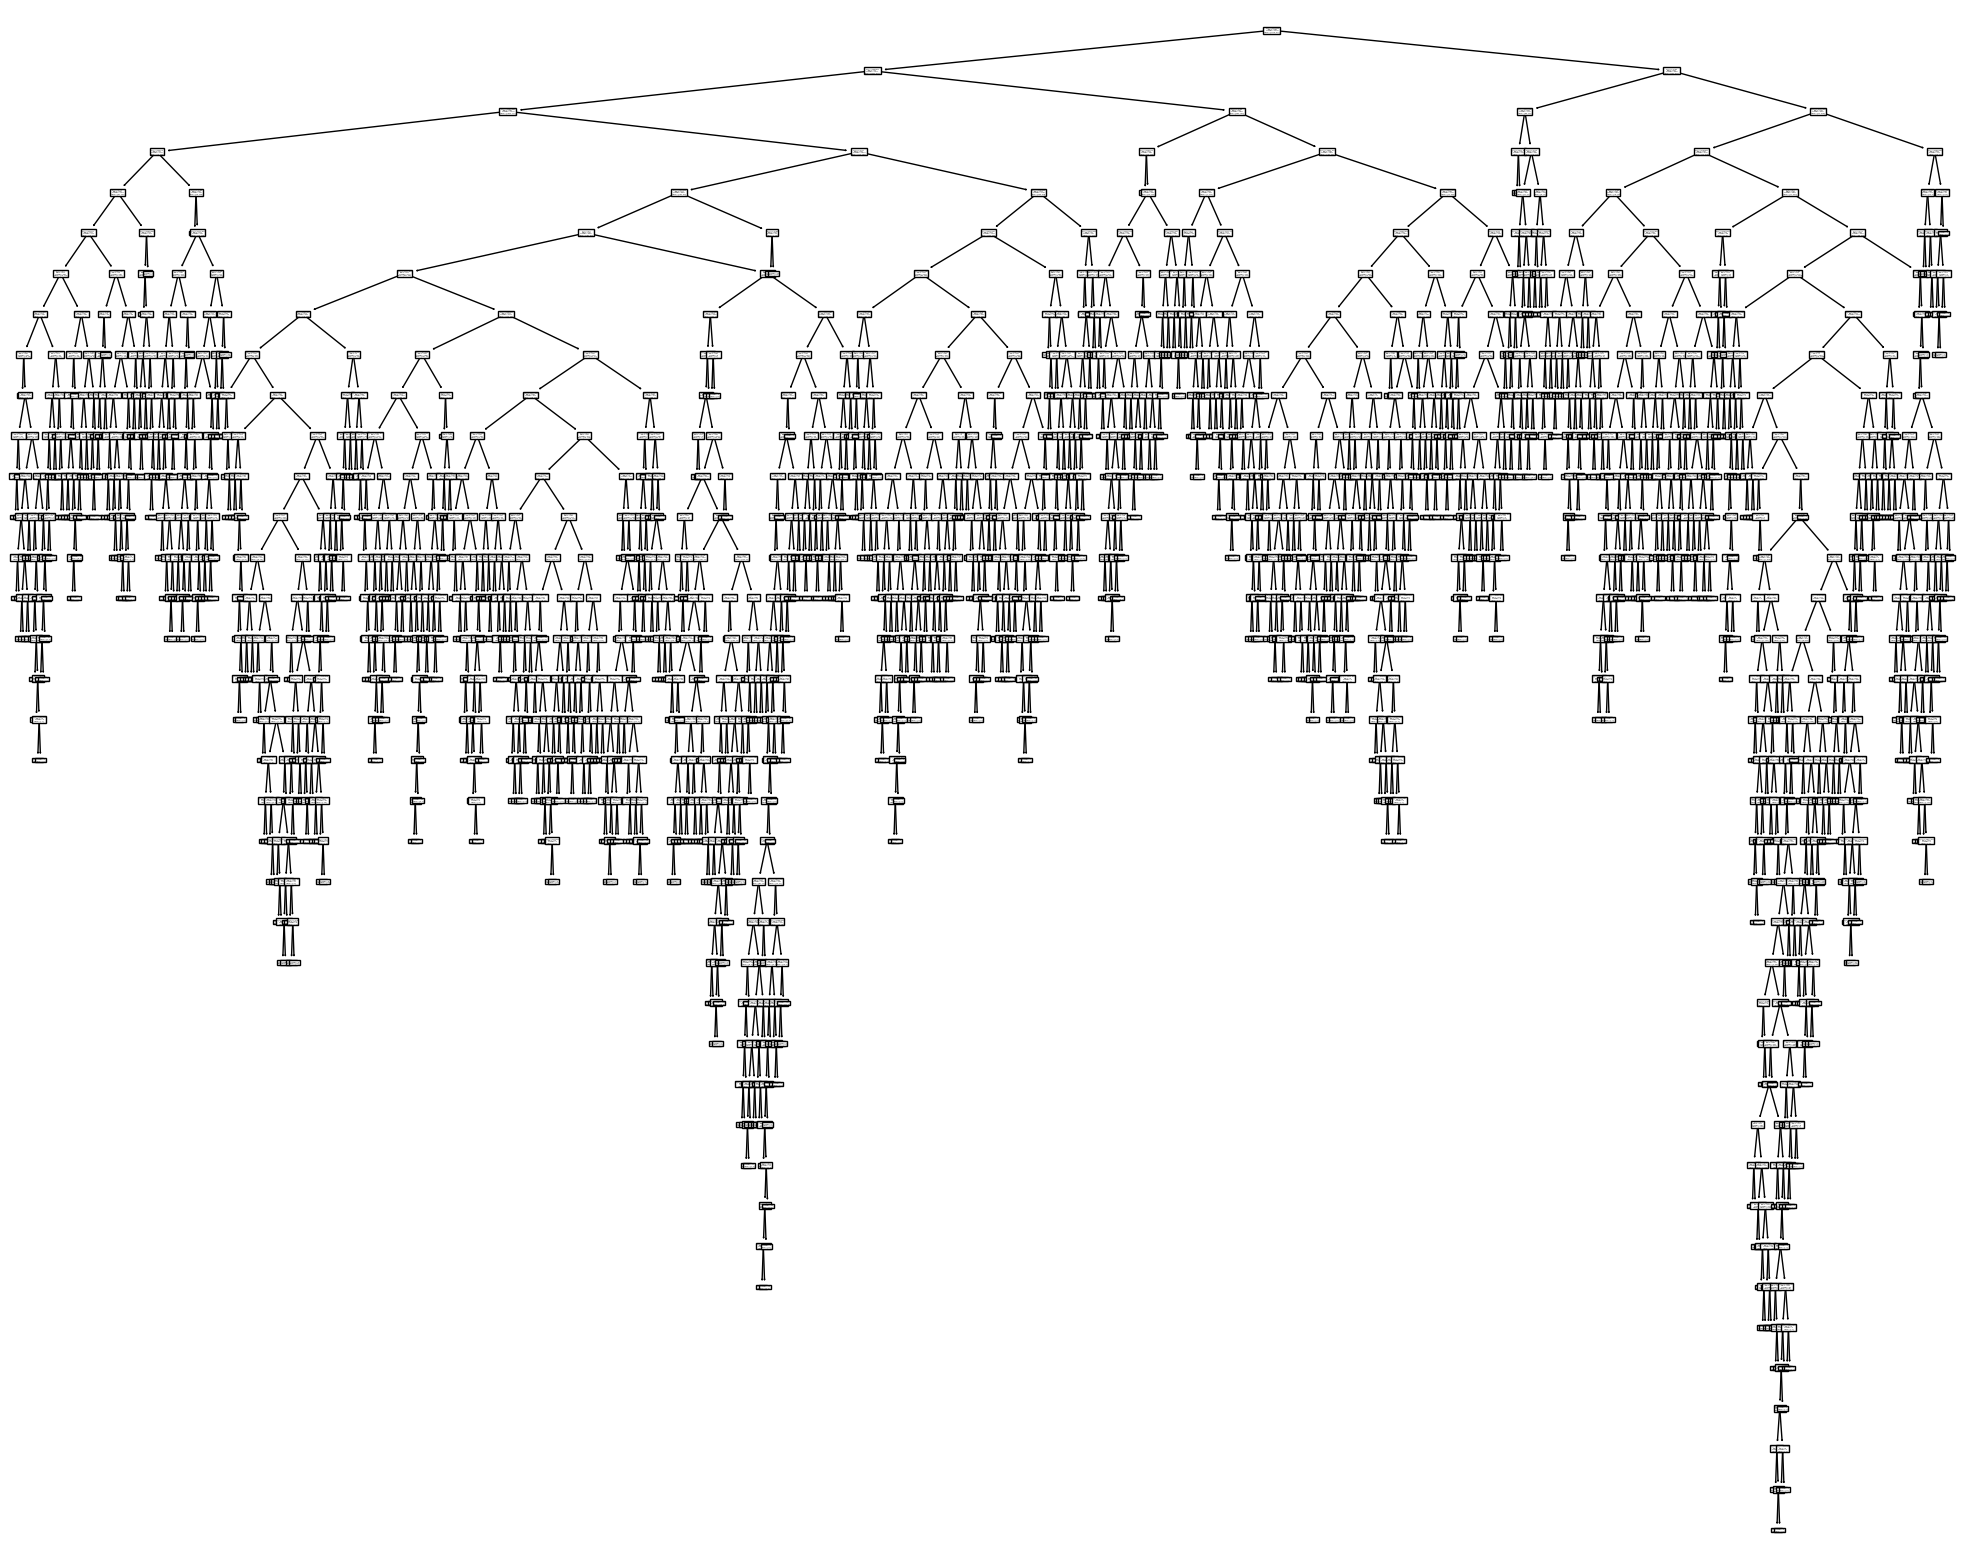

In [21]:
#Affichage de l'arbre
fig=plt.figure(figsize=(25,20))
_= plot_tree(clf)

In [22]:
#Prédiction des classes train
print(clf.predict_proba(Xt[0:5]))
#Précision:
print(f"La précision est de {round(clf.score(Xt,Yt),4)*100}% pour l'échantillon d'entraînement")

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
La précision est de 100.0% pour l'échantillon d'entraînement


In [61]:
#Prédiction des classes test
print(clf.predict_proba(Xte))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


### Bagging

In [36]:
#Pour le bagging on transorme Yt en vecteur à une dimension
Ytb=Yt["pos_label"]

#Recherche des meilleurs paramètres
parameters = {'n_estimators':[50,100,200],
              'max_samples':[0.4,0.8,1],
              'max_features':[0.4,0.6,0.8]
             }
bagopt = BaggingClassifier(random_state=0)
clfb = GridSearchCV(bagopt, parameters)
clfb.fit(Xt,Ytb)
print(f"Meilleur paramètre: {clfb.best_params_} avec précision moyenne de {round(clfb.best_score_,4)*100}%")

Meilleur paramètre: {'max_features': 0.8, 'max_samples': 0.4, 'n_estimators': 100} avec précision moyenne de 79.93%


In [64]:
final_bag = clfb.best_estimator_
#final_bag.predict(Xte)
final_bag.predict_proba(Xte)

array([[0.65, 0.35],
       [0.61, 0.39],
       [0.55, 0.45],
       ...,
       [0.73, 0.27],
       [0.05, 0.95],
       [0.84, 0.16]])

In [41]:
#clfbest=BaggingClassifier(n_estimators=100, max_features=0.8, max_samples=0.4, random_state=0)

### Random Forest

In [46]:
#Meilleur estimateur
parameters = {'n_estimators':[9,10,11],
              'max_depth':[12,14,16],
              'min_samples_split':[7,8,9],
              'max_samples':[0.1,0.3,0.5],
              'min_impurity_decrease':[0.0001,0.001,0.01]
             }
#On utilise aussi Yt en vecteur
rfopt = RandomForestClassifier()
clfr = GridSearchCV(rfopt, parameters)
clfr.fit(Xt, Ytb)
print(f"Meilleur paramètre: {clfr.best_params_} avec précision moyenne de {round(clfr.best_score_,4)*100}%")

Meilleur paramètre: {'max_depth': 14, 'max_samples': 0.1, 'min_impurity_decrease': 0.01, 'min_samples_split': 9, 'n_estimators': 9} avec précision moyenne de 82.55%


In [63]:
final_for = clfr.best_estimator_
#final_for.predict(Xte)
clfr.predict_proba(Xte)

array([[0.54700756, 0.45299244],
       [0.41631833, 0.58368167],
       [0.54700756, 0.45299244],
       ...,
       [0.51295122, 0.48704878],
       [0.29263029, 0.70736971],
       [0.75335952, 0.24664048]])

In [48]:
#clfrbest=RandomForestClassifier(max_depth=14, max_samples= 0.1, min_impurity_decrease= 0.01, min_samples_split= 9, n_estimators= 9)

## On part sur le bagging

In [71]:
clfbest=BaggingClassifier(n_estimators=100, max_features=0.8, max_samples=0.4, random_state=0)
clfbest.fit(Xt,Ytb)
prob=clfbest.predict_proba(Xte)
prob

array([[0.65, 0.35],
       [0.61, 0.39],
       [0.55, 0.45],
       ...,
       [0.73, 0.27],
       [0.05, 0.95],
       [0.84, 0.16]])

In [78]:
#On isole P(pos_label=1):
pr=[prob[i][1] for i in range(len(prob))]
pr

[0.35,
 0.39,
 0.45,
 0.45,
 0.49,
 0.4,
 0.48,
 0.47,
 0.37,
 0.37,
 0.51,
 0.31,
 0.5,
 0.48,
 0.16,
 0.42,
 0.35,
 0.42,
 0.47,
 0.5,
 0.44,
 0.13,
 0.45,
 0.4,
 0.5,
 0.48,
 0.38,
 0.32,
 0.38,
 0.39,
 0.44,
 0.44,
 0.4,
 0.17,
 0.47,
 0.46,
 0.37,
 0.1,
 0.5,
 0.46,
 0.49,
 0.38,
 0.39,
 0.18,
 0.48,
 0.46,
 0.49,
 0.32,
 0.48,
 0.49,
 0.42,
 0.46,
 0.48,
 0.63,
 0.29,
 0.46,
 0.47,
 0.48,
 0.41,
 0.35,
 0.4,
 0.34,
 0.47,
 0.44,
 0.46,
 0.37,
 0.42,
 0.34,
 0.48,
 0.31,
 0.39,
 0.41,
 0.45,
 0.44,
 0.39,
 0.37,
 0.41,
 0.46,
 0.09,
 0.45,
 0.49,
 0.54,
 0.45,
 0.29,
 0.31,
 0.47,
 0.46,
 0.39,
 0.37,
 0.56,
 0.41,
 0.36,
 0.36,
 0.48,
 0.24,
 0.48,
 0.49,
 0.39,
 0.37,
 0.34,
 0.44,
 0.43,
 0.39,
 0.45,
 0.44,
 0.46,
 0.43,
 0.44,
 0.51,
 0.43,
 0.2,
 0.3,
 0.23,
 0.62,
 0.37,
 0.37,
 0.36,
 0.47,
 0.45,
 0.43,
 0.36,
 0.4,
 0.44,
 0.49,
 0.48,
 0.49,
 0.32,
 0.44,
 0.49,
 0.48,
 0.51,
 0.38,
 0.49,
 0.36,
 0.49,
 0.16,
 0.41,
 0.47,
 0.49,
 0.32,
 0.14,
 0.55,
 0.48,
 0.43,
 0.4

In [81]:
res=X_test['id']
list(res)

['23168-TEST.wav',
 '23169-TEST.wav',
 '23170-TEST.wav',
 '23171-TEST.wav',
 '23172-TEST.wav',
 '23173-TEST.wav',
 '23174-TEST.wav',
 '23175-TEST.wav',
 '23176-TEST.wav',
 '23177-TEST.wav',
 '23178-TEST.wav',
 '23179-TEST.wav',
 '23180-TEST.wav',
 '23181-TEST.wav',
 '23182-TEST.wav',
 '23183-TEST.wav',
 '23184-TEST.wav',
 '23185-TEST.wav',
 '23186-TEST.wav',
 '23187-TEST.wav',
 '23188-TEST.wav',
 '23189-TEST.wav',
 '23190-TEST.wav',
 '23191-TEST.wav',
 '23192-TEST.wav',
 '23193-TEST.wav',
 '23194-TEST.wav',
 '23195-TEST.wav',
 '23196-TEST.wav',
 '23197-TEST.wav',
 '23198-TEST.wav',
 '23199-TEST.wav',
 '23200-TEST.wav',
 '23201-TEST.wav',
 '23202-TEST.wav',
 '23203-TEST.wav',
 '23204-TEST.wav',
 '23205-TEST.wav',
 '23206-TEST.wav',
 '23207-TEST.wav',
 '23208-TEST.wav',
 '23209-TEST.wav',
 '23210-TEST.wav',
 '23211-TEST.wav',
 '23212-TEST.wav',
 '23213-TEST.wav',
 '23214-TEST.wav',
 '23215-TEST.wav',
 '23216-TEST.wav',
 '23217-TEST.wav',
 '23218-TEST.wav',
 '23219-TEST.wav',
 '23220-TEST

In [83]:
cont=[]
fin= pd.DataFrame((zip(list(res), pr)), columns=["id", "pos_label"])
fin

,id,pos_label
0,23168-TEST.wav,0.35
1,23169-TEST.wav,0.39
2,23170-TEST.wav,0.45
3,23171-TEST.wav,0.45
4,23172-TEST.wav,0.49
...,...,...
945,24113-TEST.wav,0.11
946,24114-TEST.wav,0.30
947,24115-TEST.wav,0.27
948,24116-TEST.wav,0.95


In [92]:
path="/users/2024/ds2/119008303/Documents/Statistiques en grande dimension et apprentissage/DataChallenge/soum.csv"
fin.to_csv(path,index=False)

In [98]:
#Création des csv X_train, Y_train, X_test (sans index):
Xtrex=X_train.drop(['index'],axis=1)
Xtsex=X_test.drop(['index'],axis=1)
Xtrex.to_csv("/users/2024/ds2/119008303/Documents/Statistiques en grande dimension et apprentissage/DataChallenge/Xtrain.csv")
Xtsex.to_csv("/users/2024/ds2/119008303/Documents/Statistiques en grande dimension et apprentissage/DataChallenge/Xtest.csv")
Yt.to_csv("/users/2024/ds2/119008303/Documents/Statistiques en grande dimension et apprentissage/DataChallenge/Ytrain.csv")